This file is to visualize the statistical properties of the dataset to gain an insight in why the model may be struggling to learn certain patterns

In [4]:
import pandas as pd
import numpy as np

data_file_path = '/mnt/iusers01/fse-ugpgt01/phy01/u97798ac/scratch/Nuclear_Transport_With_ML/ML/data/280_workers_2_runs_Abel.csv'
df = pd.read_csv(data_file_path)

column_keys = np.array([(i, col) for i, col in enumerate(df.columns)])
print("Column keys:\n", column_keys)

elements_to_keep = ['U238', 'U235', 'Pu240', 'Pu241']
statefeatures_to_keep = ['time_days', 'k_eff', 'power_W_g', 'int_p_W', 'fuel_temp_K', 'mod_temp_K', 'clad_temp_K', 
                         'mod_density_g_cm3', 'boron_ppm']

# Remove the unnecessary columns from the dataframe
df = df[elements_to_keep + statefeatures_to_keep]
data_array = df.to_numpy()
print("\nData array shape:", data_array.shape)


Column keys:
 [['0' 'run_label']
 ['1' 'time_days']
 ['2' 'k_eff']
 ['3' 'k_eff_std']
 ['4' 'power_W_g']
 ['5' 'int_p_W']
 ['6' 'fuel_temp_K']
 ['7' 'mod_temp_K']
 ['8' 'clad_temp_K']
 ['9' 'mod_density_g_cm3']
 ['10' 'boron_ppm']
 ['11' 'Ag107']
 ['12' 'Ag109']
 ['13' 'Ag109_m1']
 ['14' 'Ag110']
 ['15' 'Ag110_m1']
 ['16' 'Ag111']
 ['17' 'Am241']
 ['18' 'Am242']
 ['19' 'Am242_m1']
 ['20' 'Am243']
 ['21' 'Am244']
 ['22' 'Am244_m1']
 ['23' 'B10']
 ['24' 'B11']
 ['25' 'Ba134']
 ['26' 'Ba137']
 ['27' 'Ba140']
 ['28' 'Br81']
 ['29' 'Br82']
 ['30' 'Cd110']
 ['31' 'Cd111']
 ['32' 'Cd112']
 ['33' 'Cd113']
 ['34' 'Cd114']
 ['35' 'Cd115']
 ['36' 'Ce140']
 ['37' 'Ce141']
 ['38' 'Ce142']
 ['39' 'Ce143']
 ['40' 'Ce144']
 ['41' 'Cm242']
 ['42' 'Cm243']
 ['43' 'Cm244']
 ['44' 'Cm245']
 ['45' 'Cm246']
 ['46' 'Cs133']
 ['47' 'Cs134']
 ['48' 'Cs135']
 ['49' 'Cs136']
 ['50' 'Cs137']
 ['51' 'Dy160']
 ['52' 'Dy161']
 ['53' 'Dy162']
 ['54' 'Dy163']
 ['55' 'Dy164']
 ['56' 'Dy165']
 ['57' 'Er162']
 ['58' 'Er1

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_file_path = '/mnt/iusers01/fse-ugpgt01/phy01/u97798ac/scratch/Nuclear_Transport_With_ML/ML/data/280_workers_2_runs_Abel.csv'
df = pd.read_csv(data_file_path)

column_keys = np.array([(i, col) for i, col in enumerate(df.columns)])

def plot_column_block(df, start_idx, n_plots=8, bins=40, x_ranges=None):
    """
    Plot histograms for n_plots columns starting at start_idx.
    
    Parameters
    ----------
    df : DataFrame
        Dataframe with all columns.
    start_idx : int
        Index of the first column to plot (as in column_keys).
    n_plots : int
        Number of columns/histograms to plot (default 8).
    bins : int
        Number of histogram bins.
    x_ranges : tuple or dict or None
        - (xmin, xmax): same x-range for all plots
        - {col_name: (xmin, xmax), ...}: per-column ranges
        - None: autoscale
    """
    cols = df.columns[start_idx:start_idx + n_plots]
    n_cols = len(cols)

    # 2 rows × 4 columns = 8 subplots
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    for ax, col in zip(axes, cols):
        data = df[col].values

        ax.hist(data, bins=bins, edgecolor='black')
        mean_val = data.mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1)

        ax.set_title(col, fontsize=10)
        ax.set_xlabel("Value")
        ax.set_ylabel("Frequency")

        # Handle x-range
        if x_ranges is not None:
            if isinstance(x_ranges, tuple):
                ax.set_xlim(*x_ranges)
            elif isinstance(x_ranges, dict) and col in x_ranges:
                ax.set_xlim(*x_ranges[col])

        # Show mean in the legend area
        ax.text(0.98, 0.95,
                f"Mean: {mean_val:.3e}",
                transform=ax.transAxes,
                ha='right', va='top', fontsize=8)

    # Remove any unused axes if n_plots < 8
    for j in range(n_cols, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Feature Distributions (columns {start_idx}–{start_idx + n_cols - 1})",
                 fontsize=14, y=1.02)
    fig.tight_layout()
    plt.show()


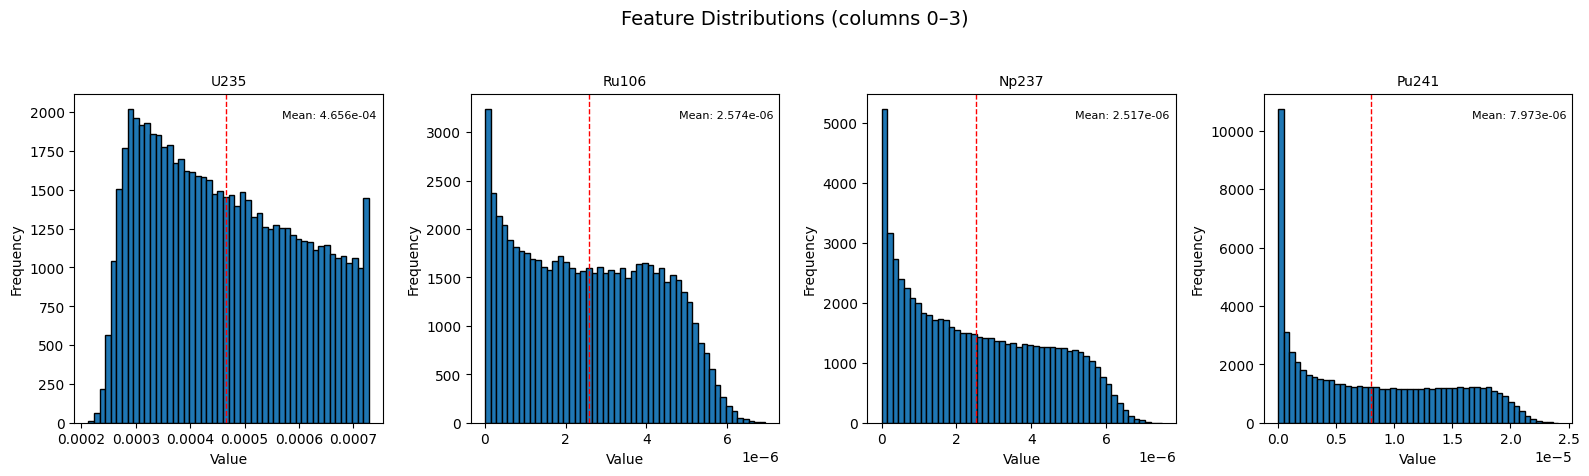

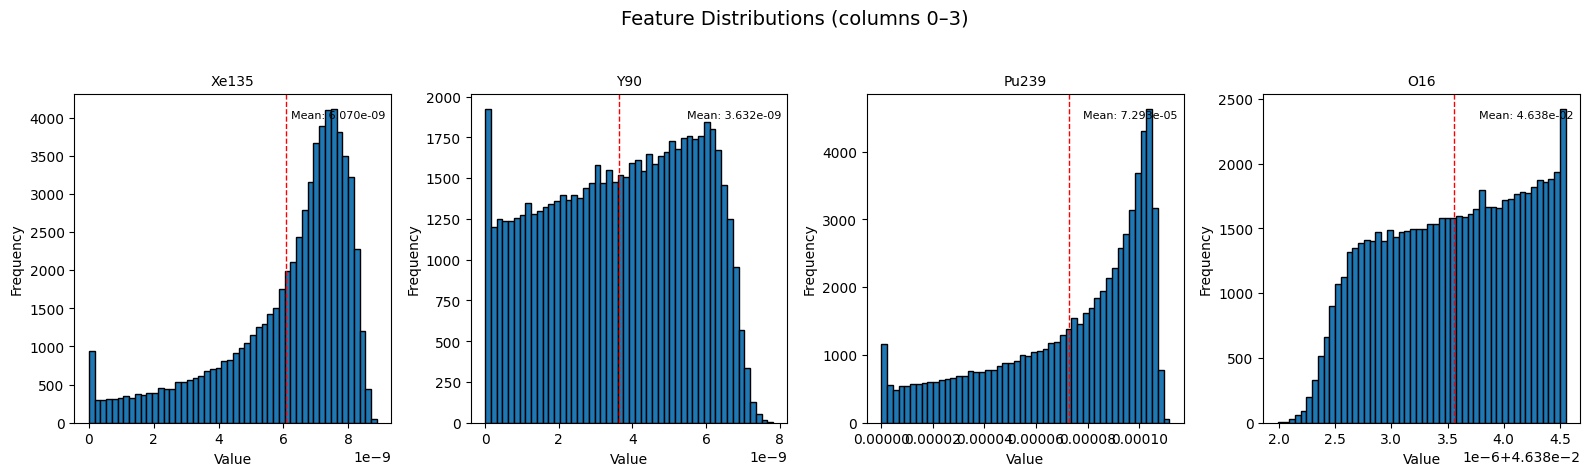

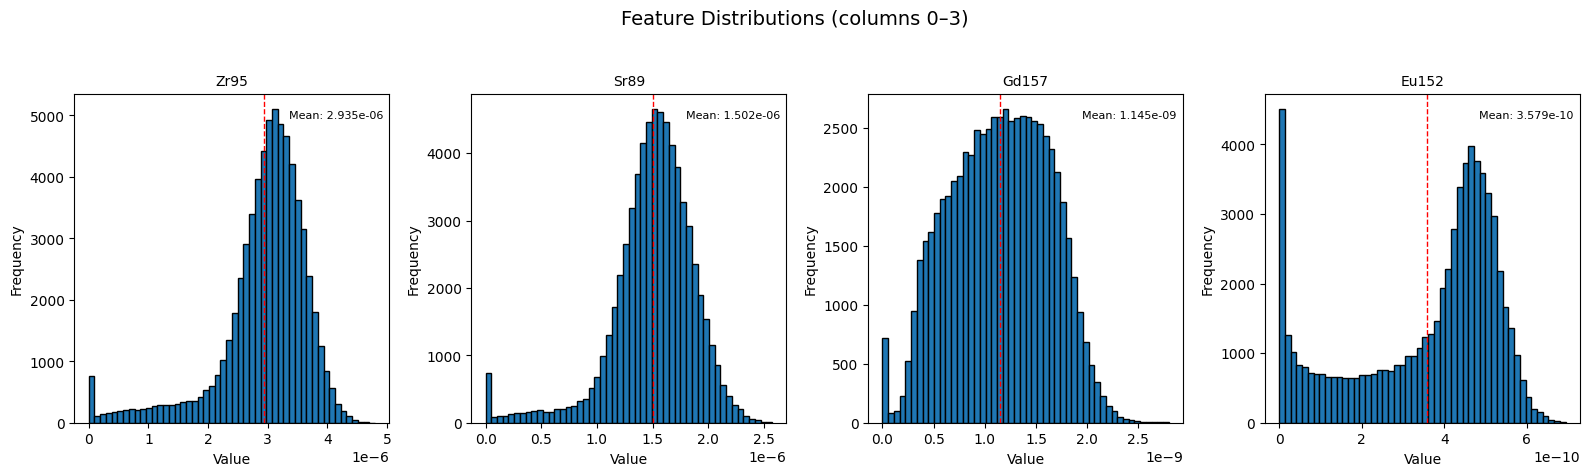

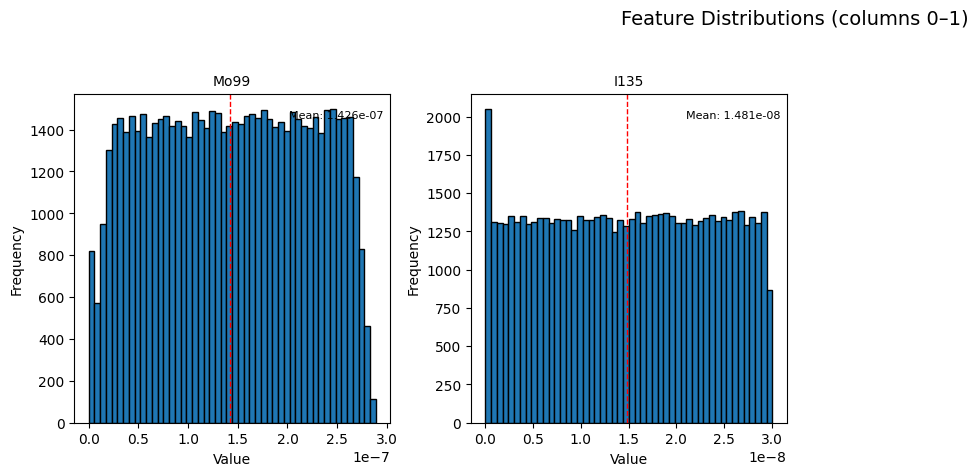

In [19]:

decreasing_elements = ['U235','Ru106','Np237','Pu241']
increasing_elements = ['Xe135','Y90','Pu239','O16']
peaked_elements = ['Zr95', 'Sr89','Gd157', 'Eu152']
uniform_elements = ['Mo99', 'I135']

def df_cropper(df, elements_to_keep):
    df_trimmed = df[elements_to_keep]
    return df_trimmed

decrease = df_cropper(df,decreasing_elements)
increase = df_cropper(df,increasing_elements)
peak = df_cropper(df,peaked_elements)
uniform = df_cropper(df,uniform_elements)



plot_column_block(decrease, start_idx=0, n_plots=8, bins=50)
plot_column_block(increase, start_idx=0, n_plots=8, bins=50)
plot_column_block(peak, start_idx=0, n_plots=8, bins=50)
plot_column_block(uniform, start_idx=0, n_plots=8, bins=50)


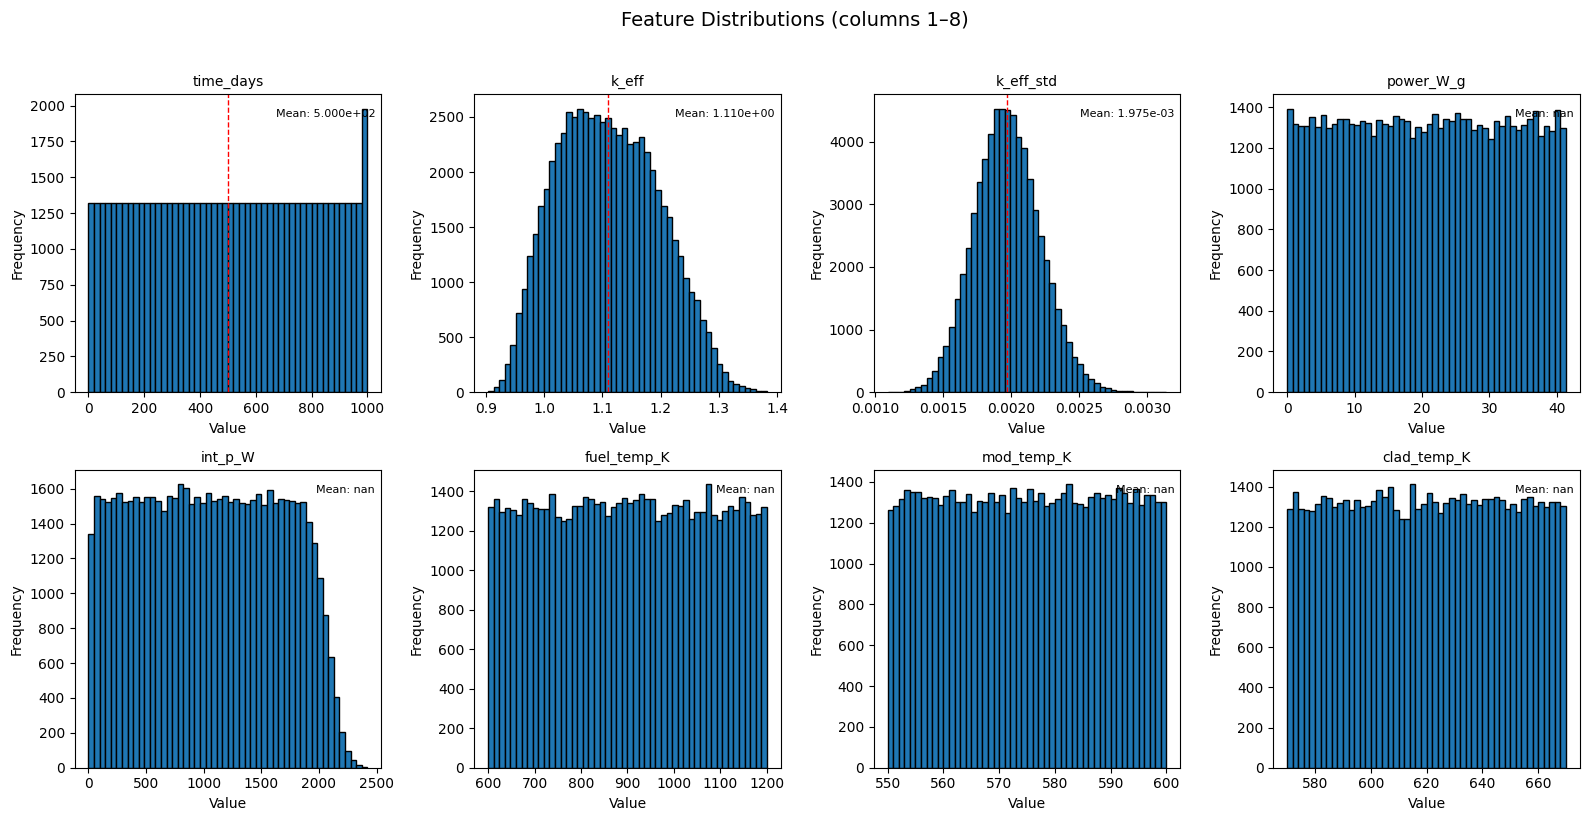

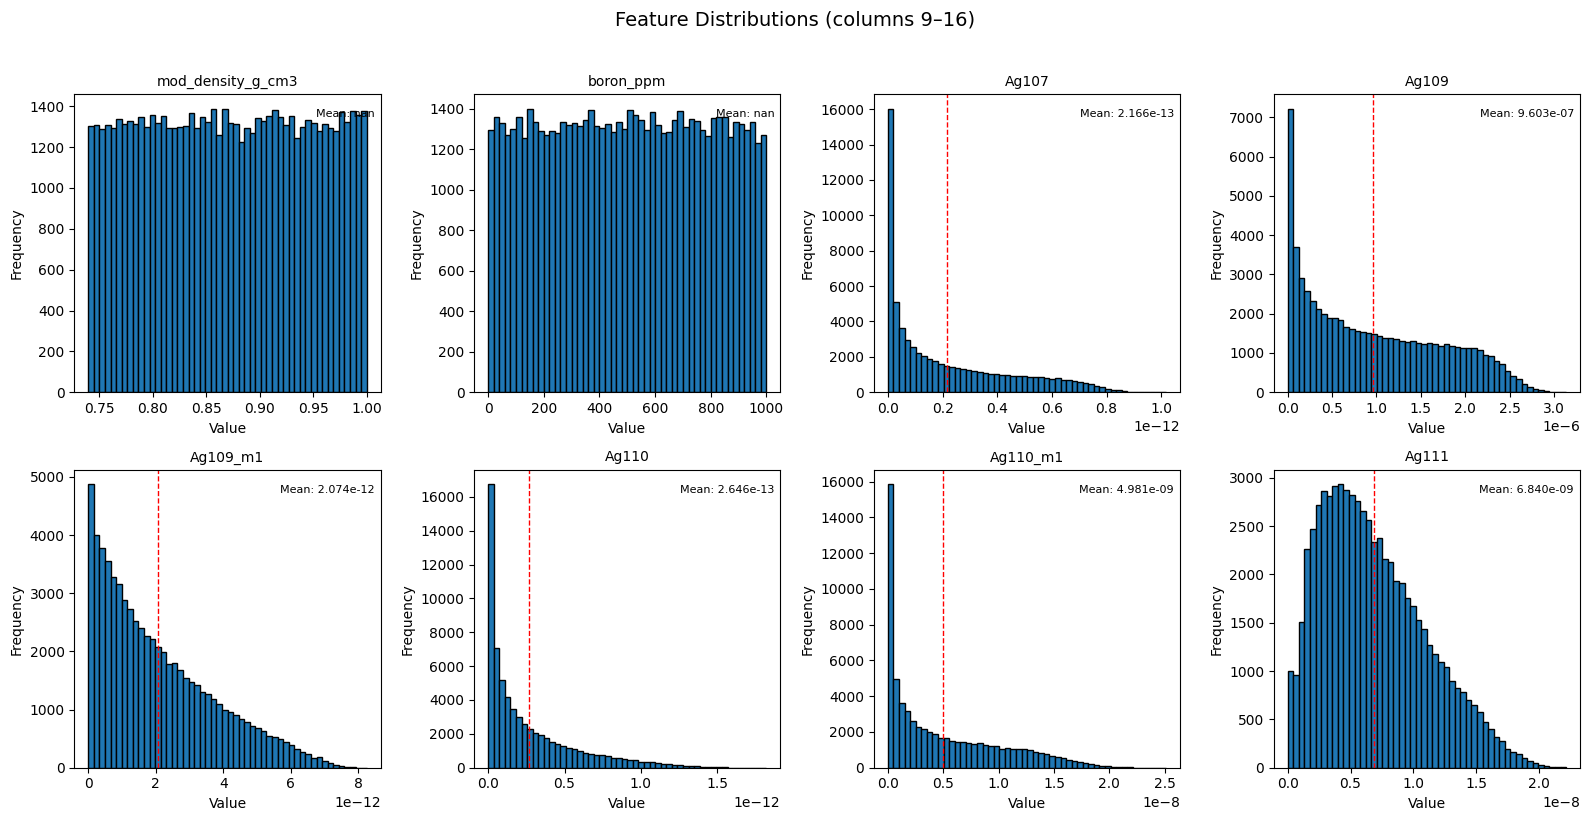

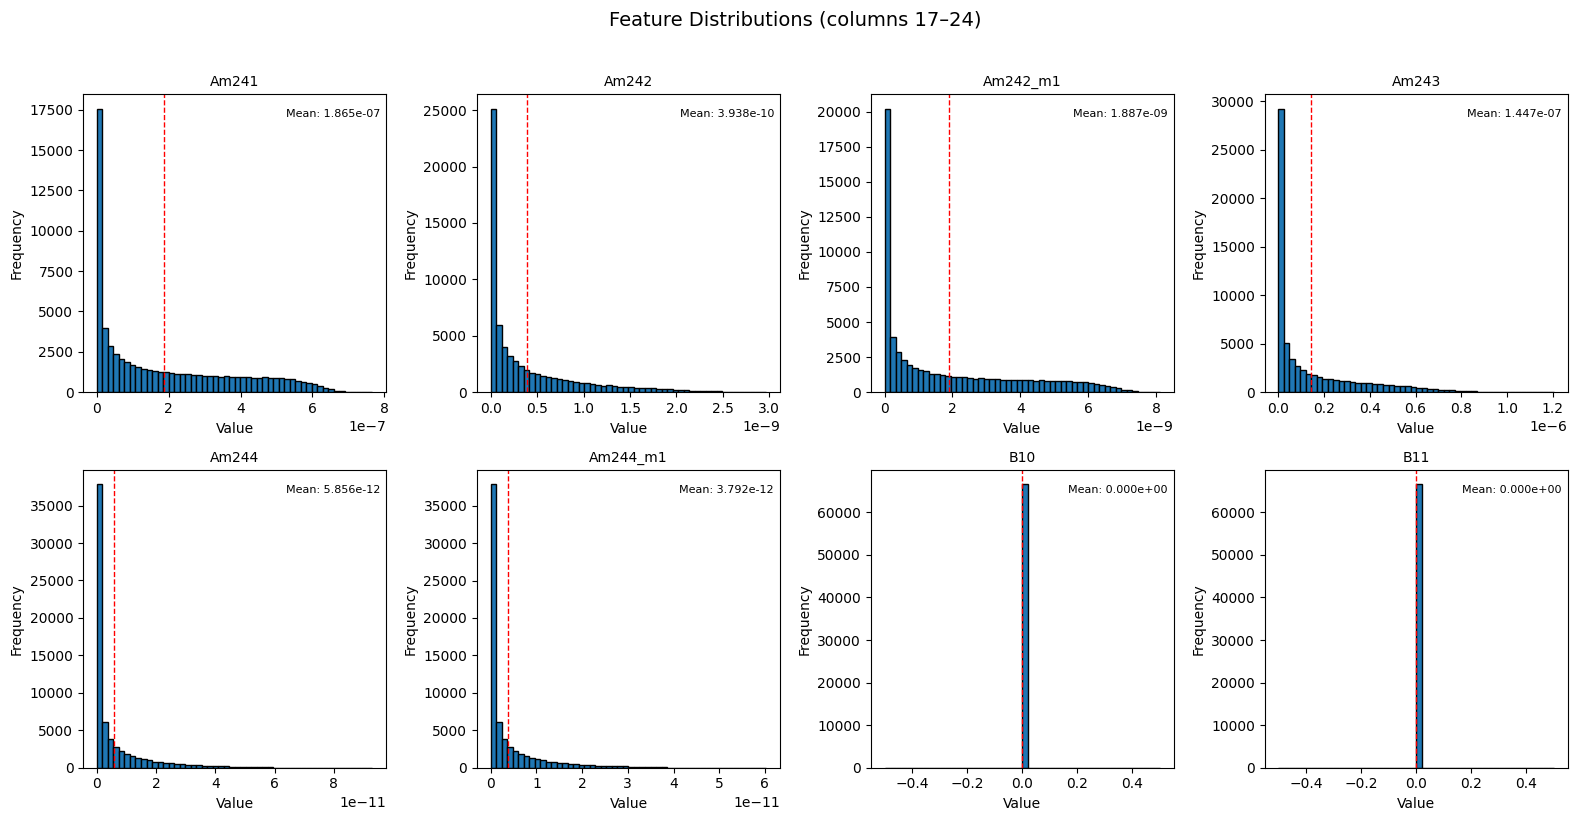

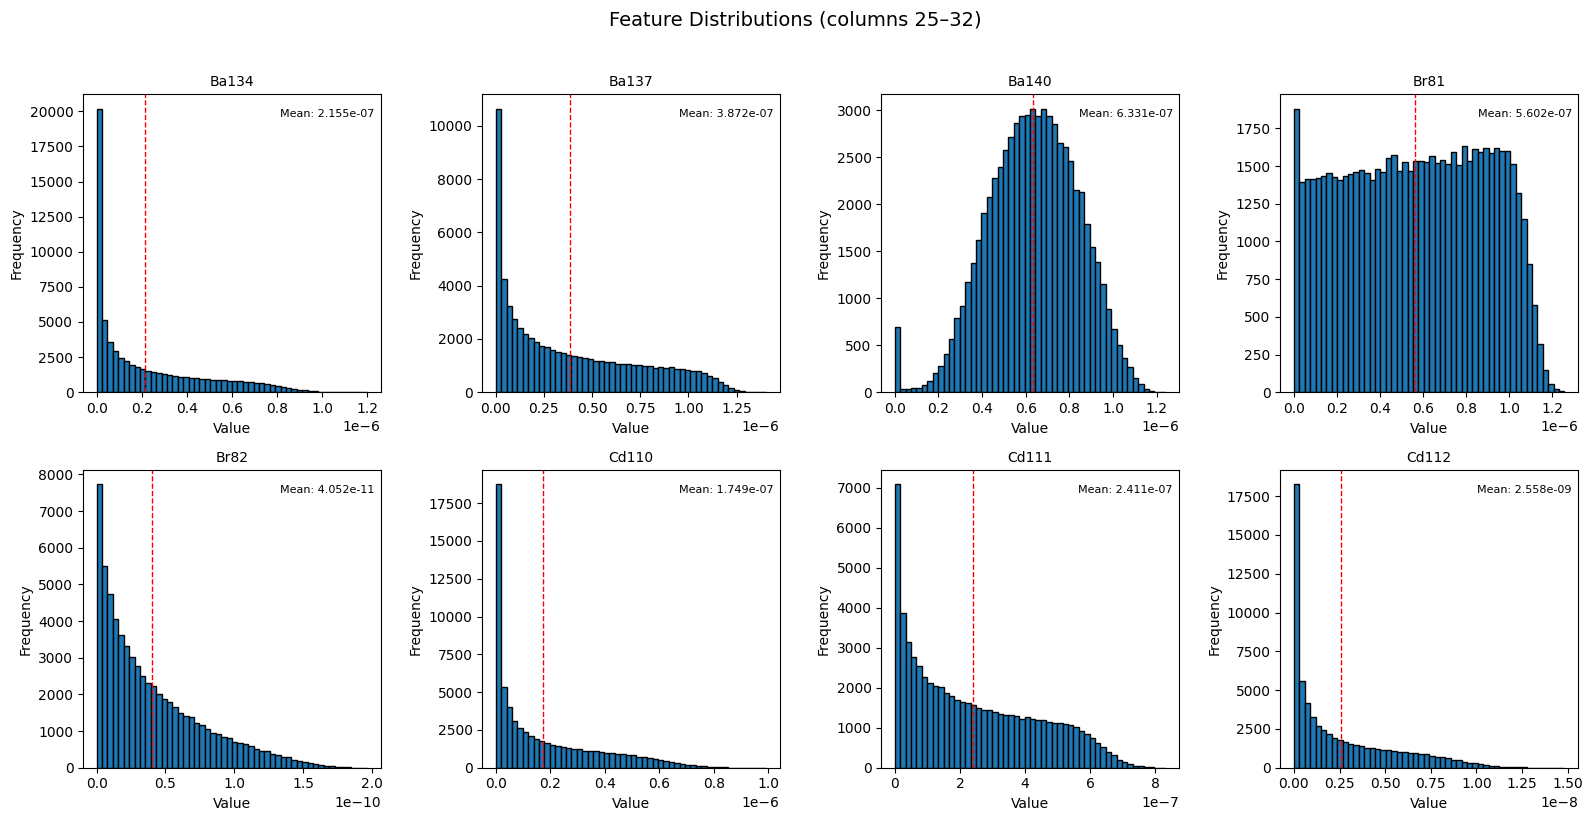

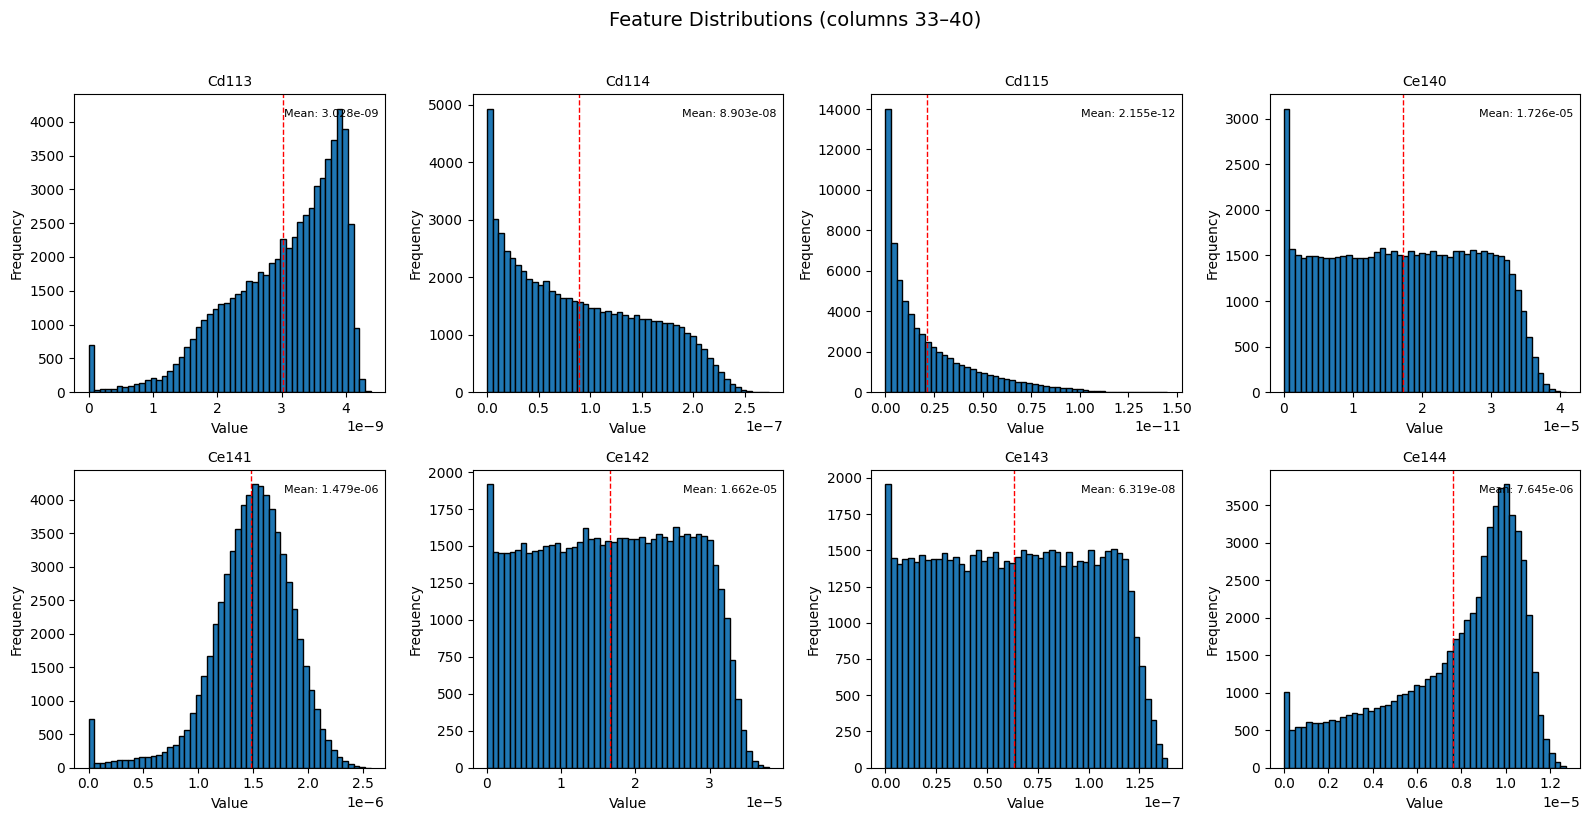

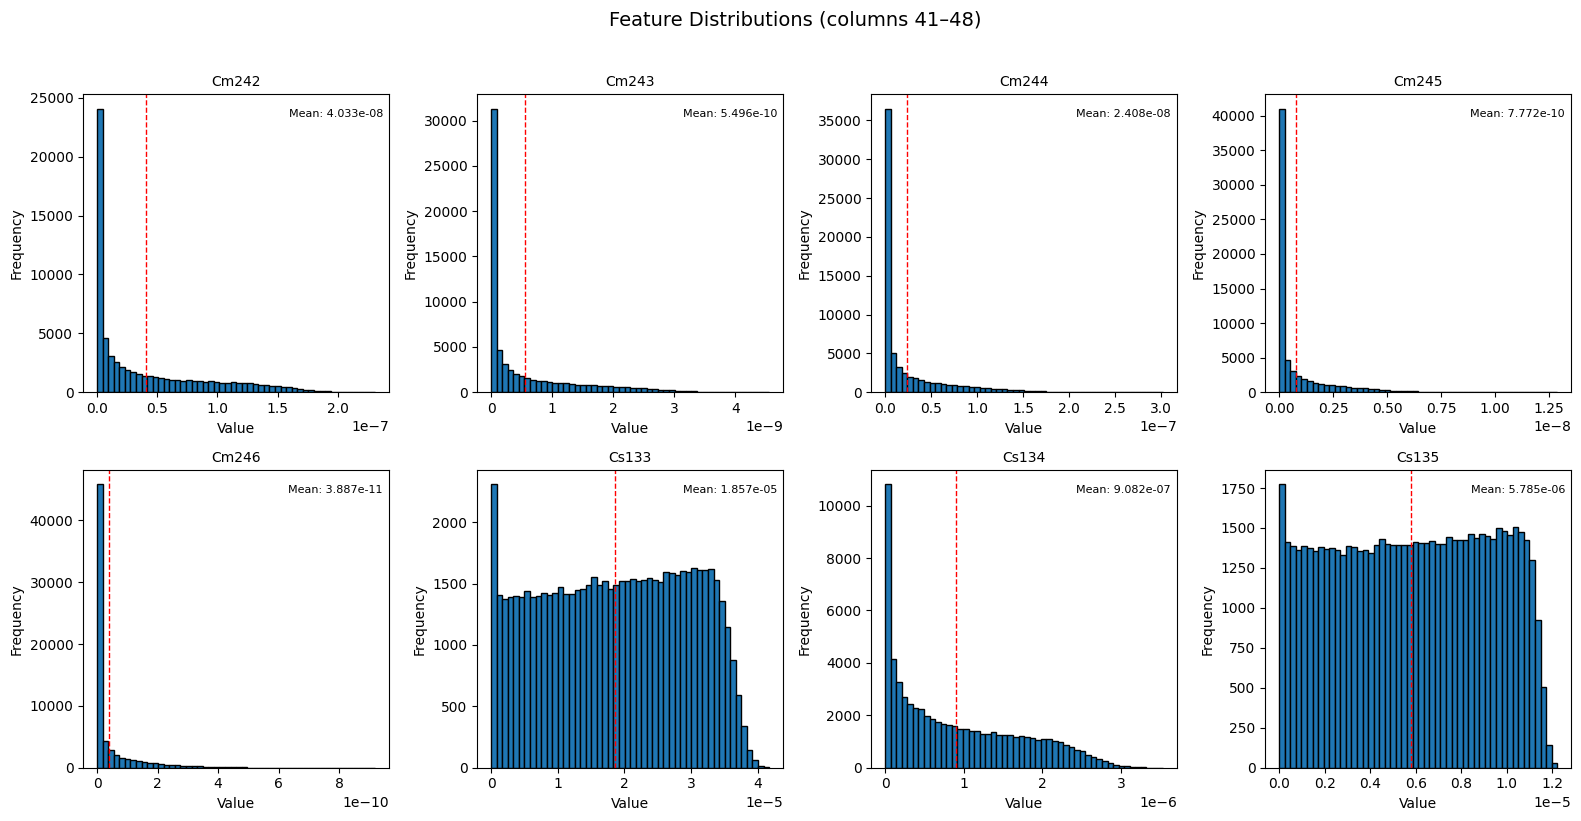

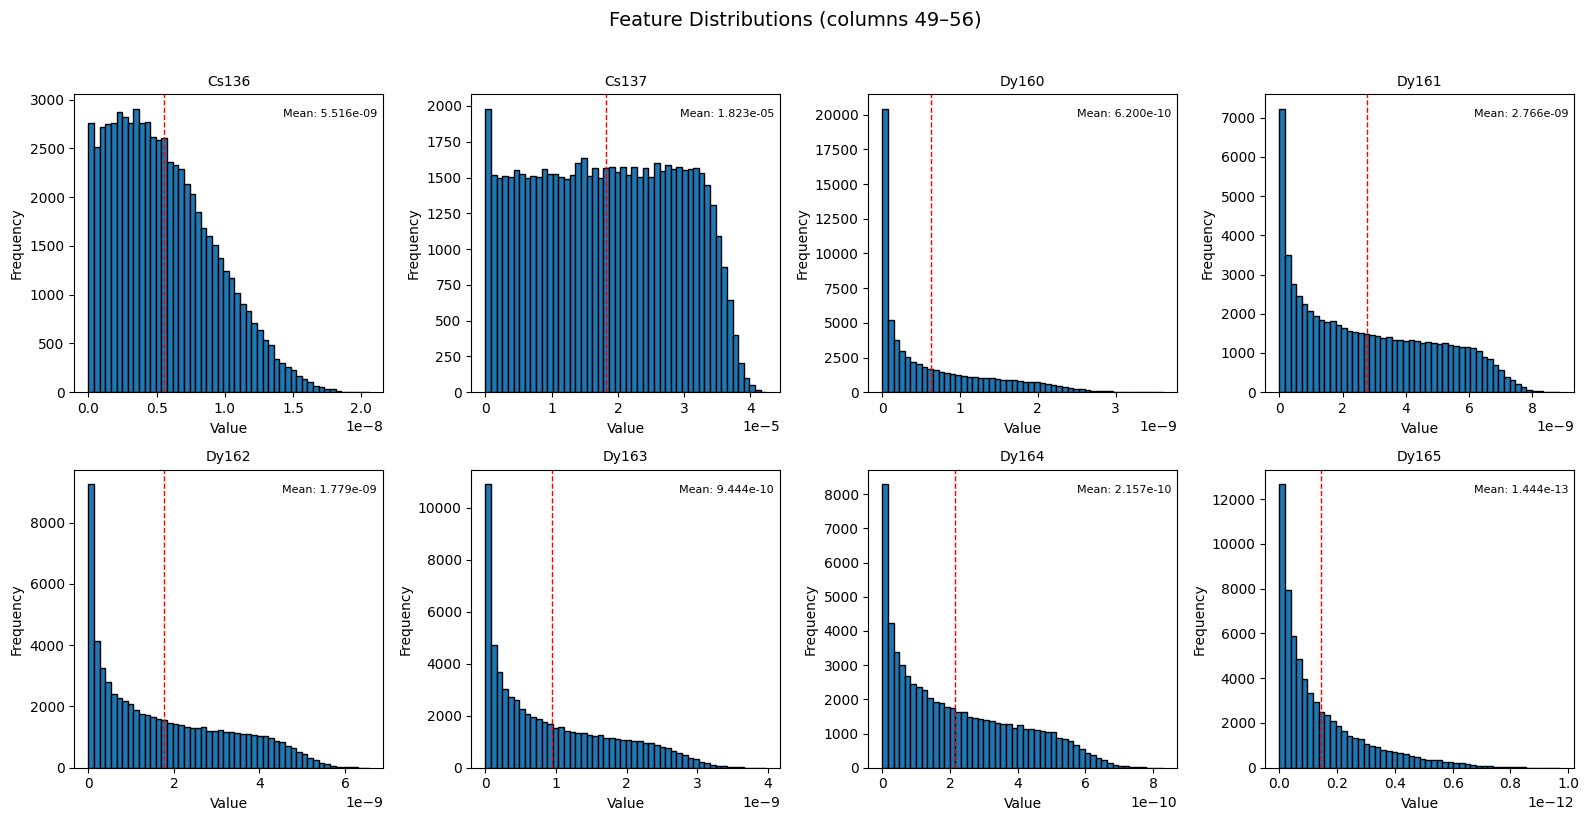

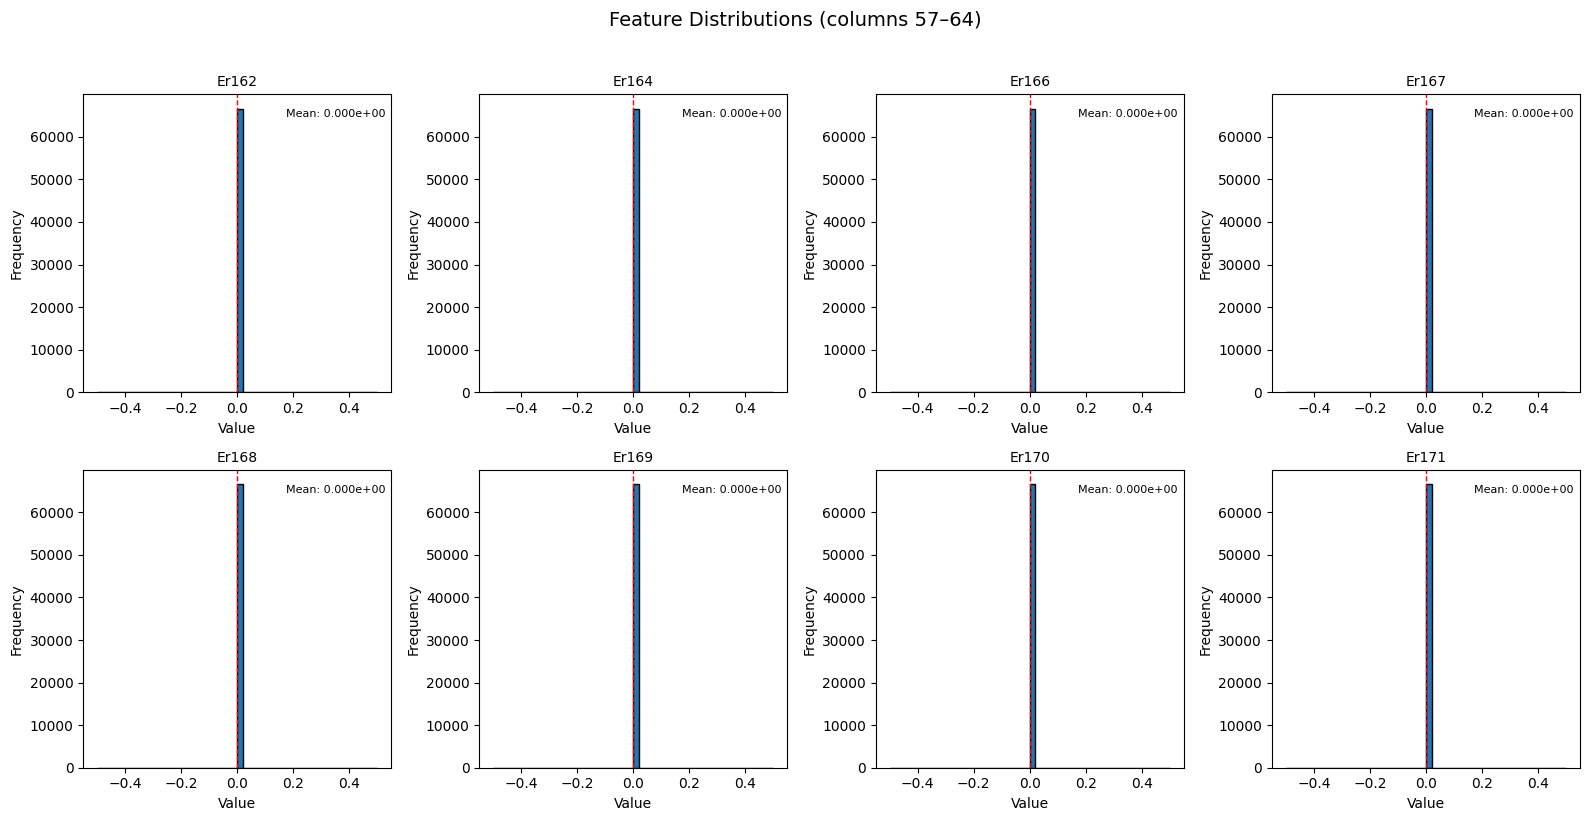

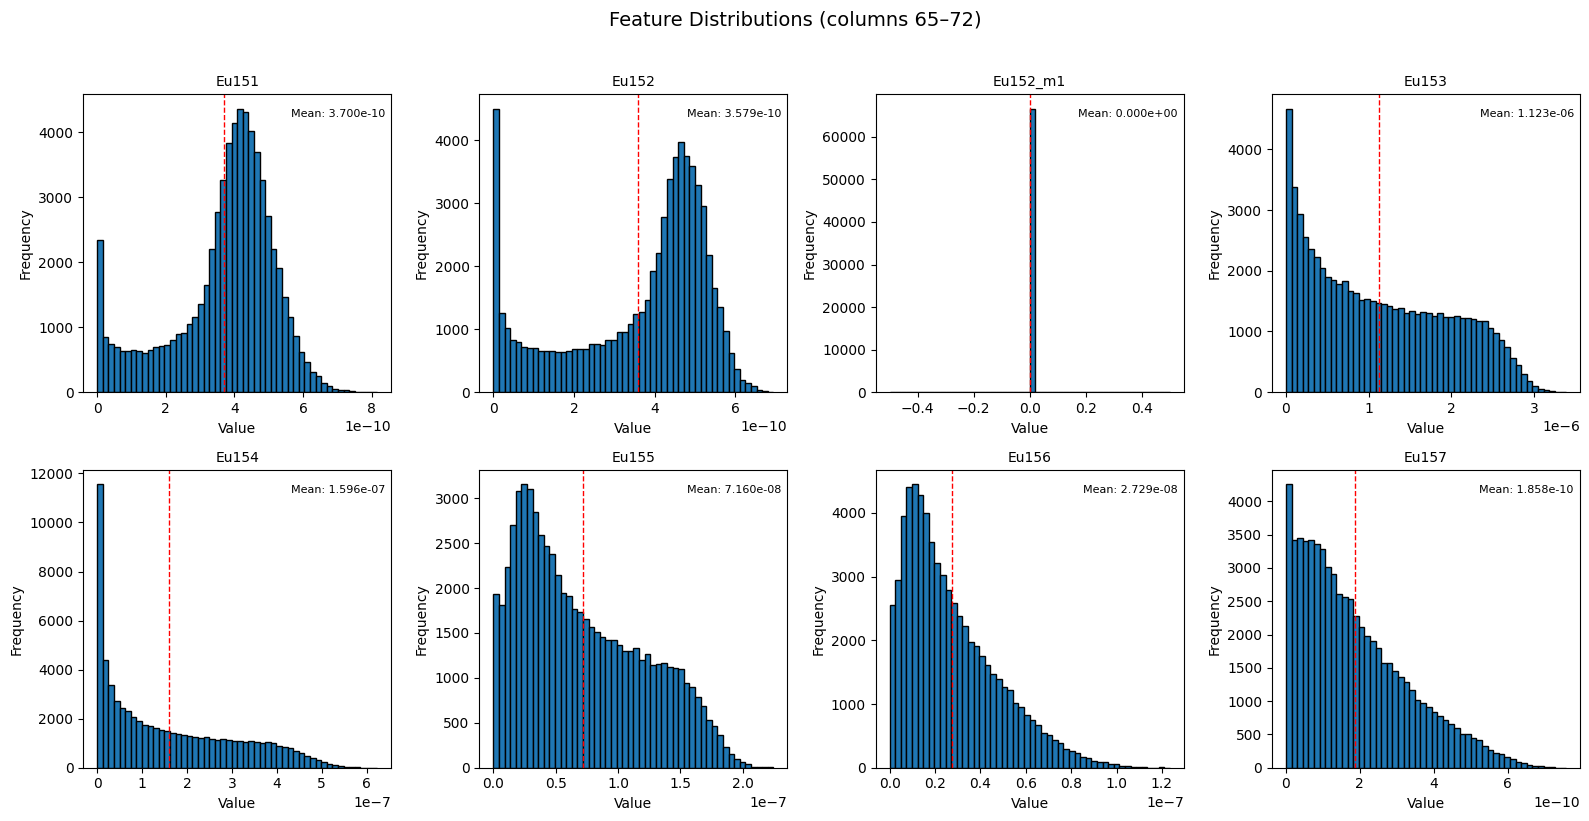

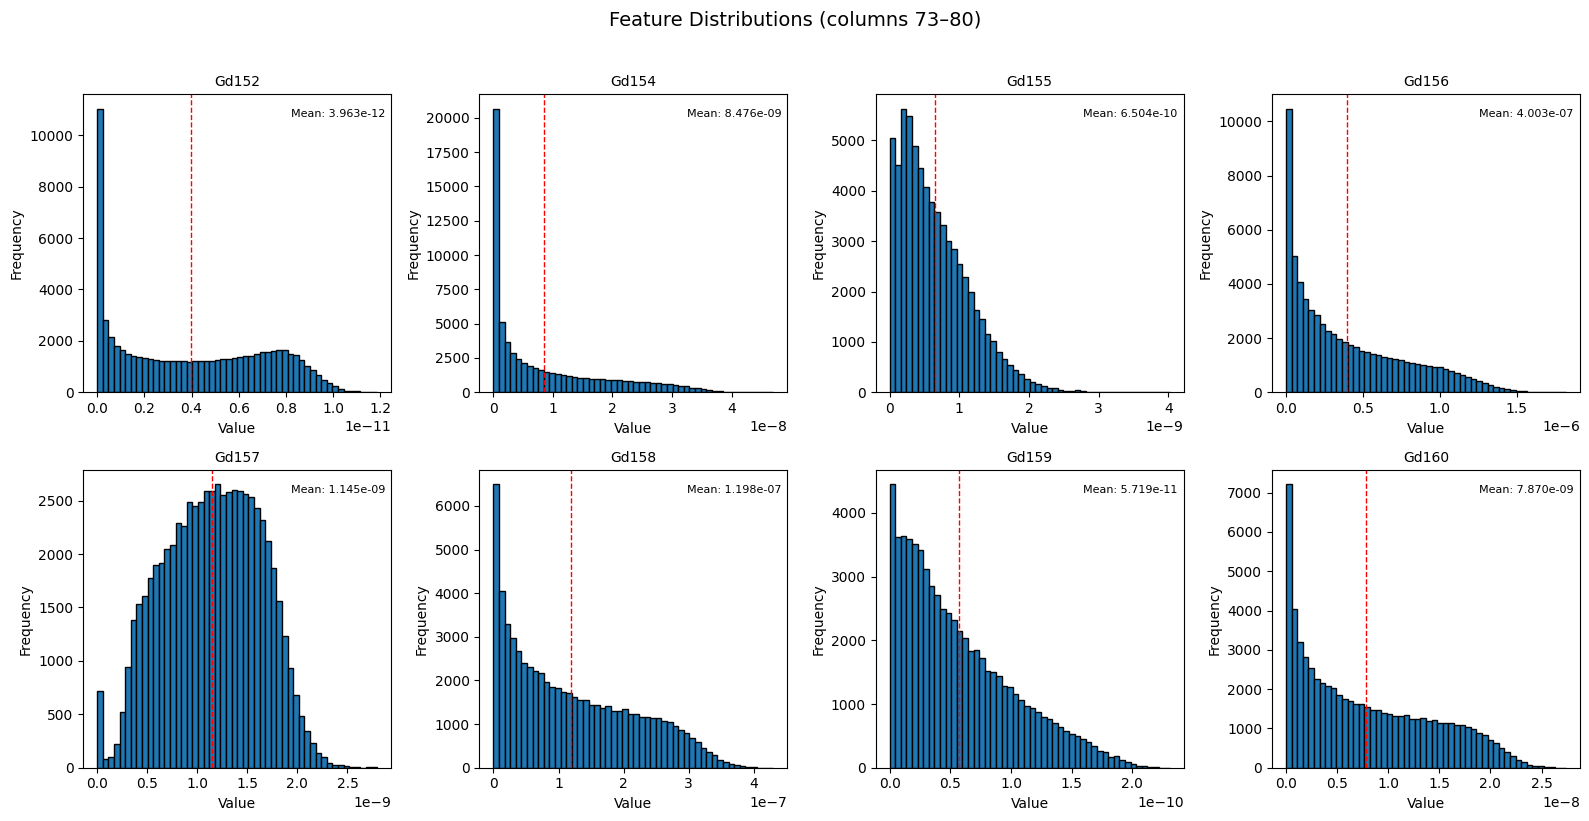

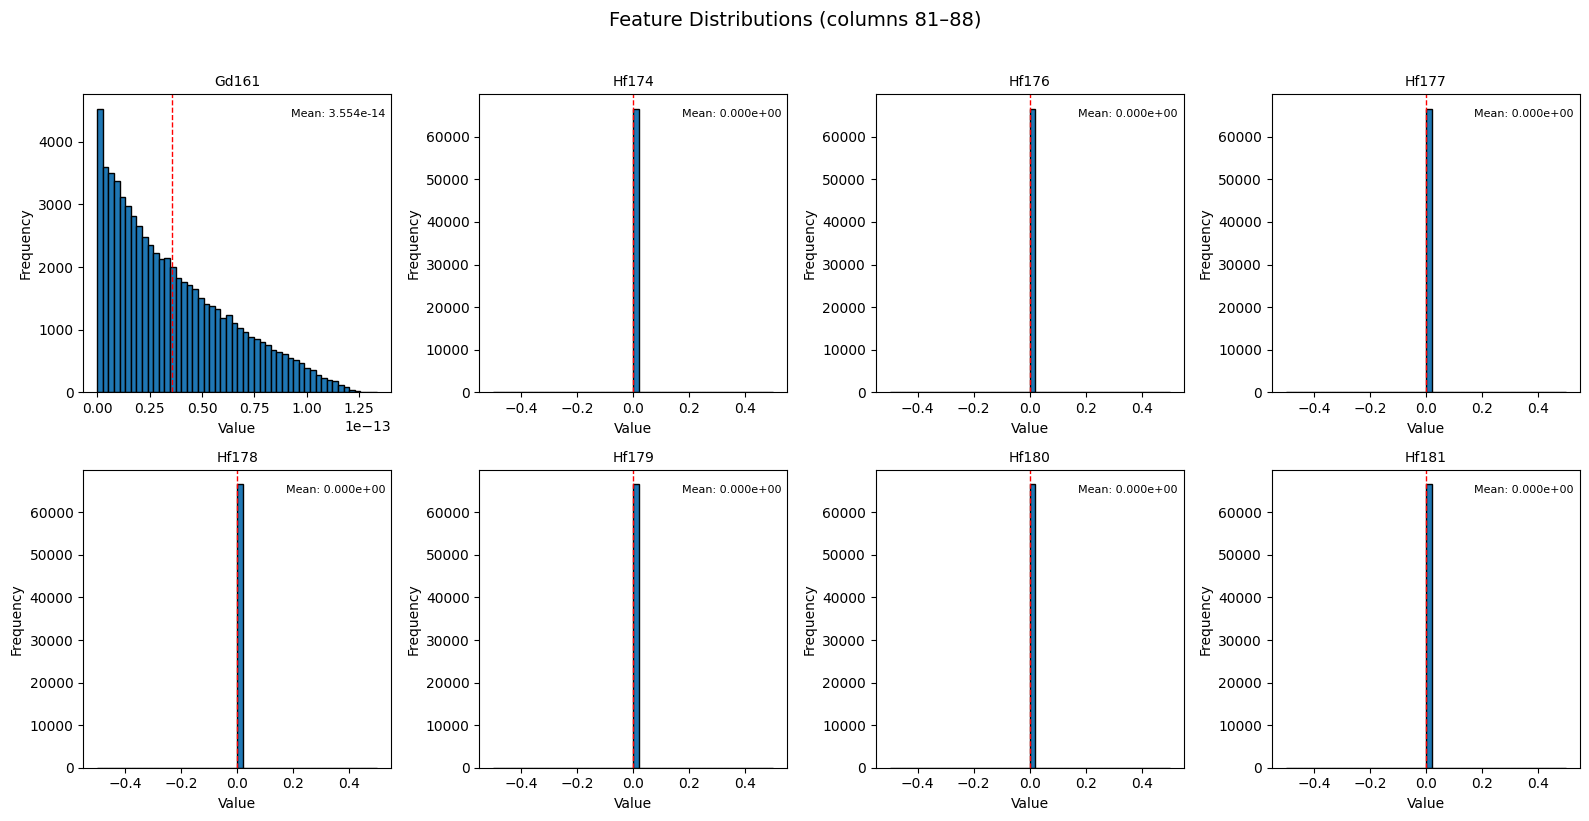

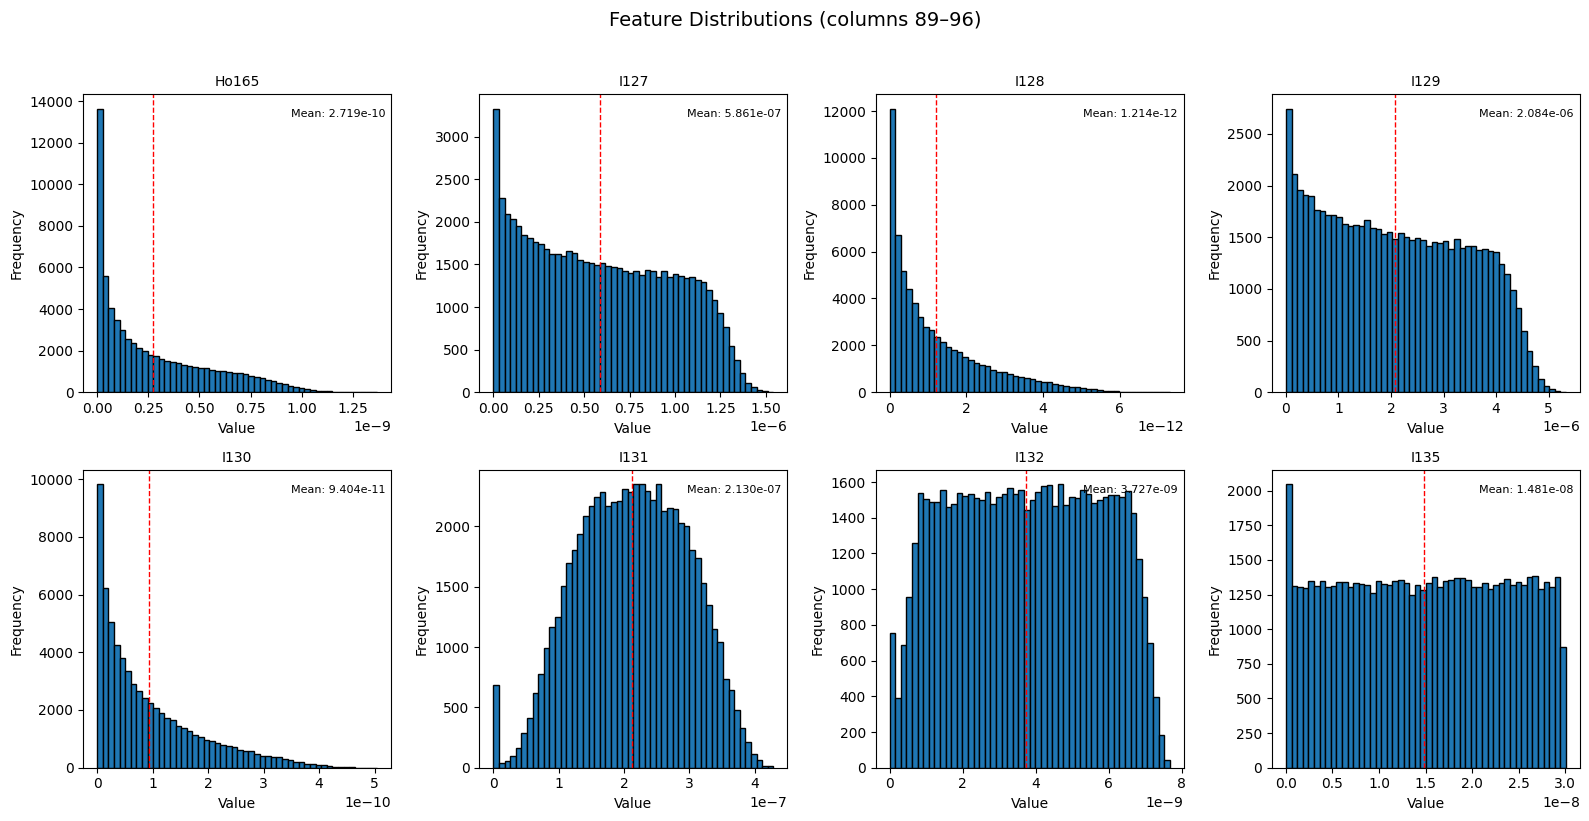

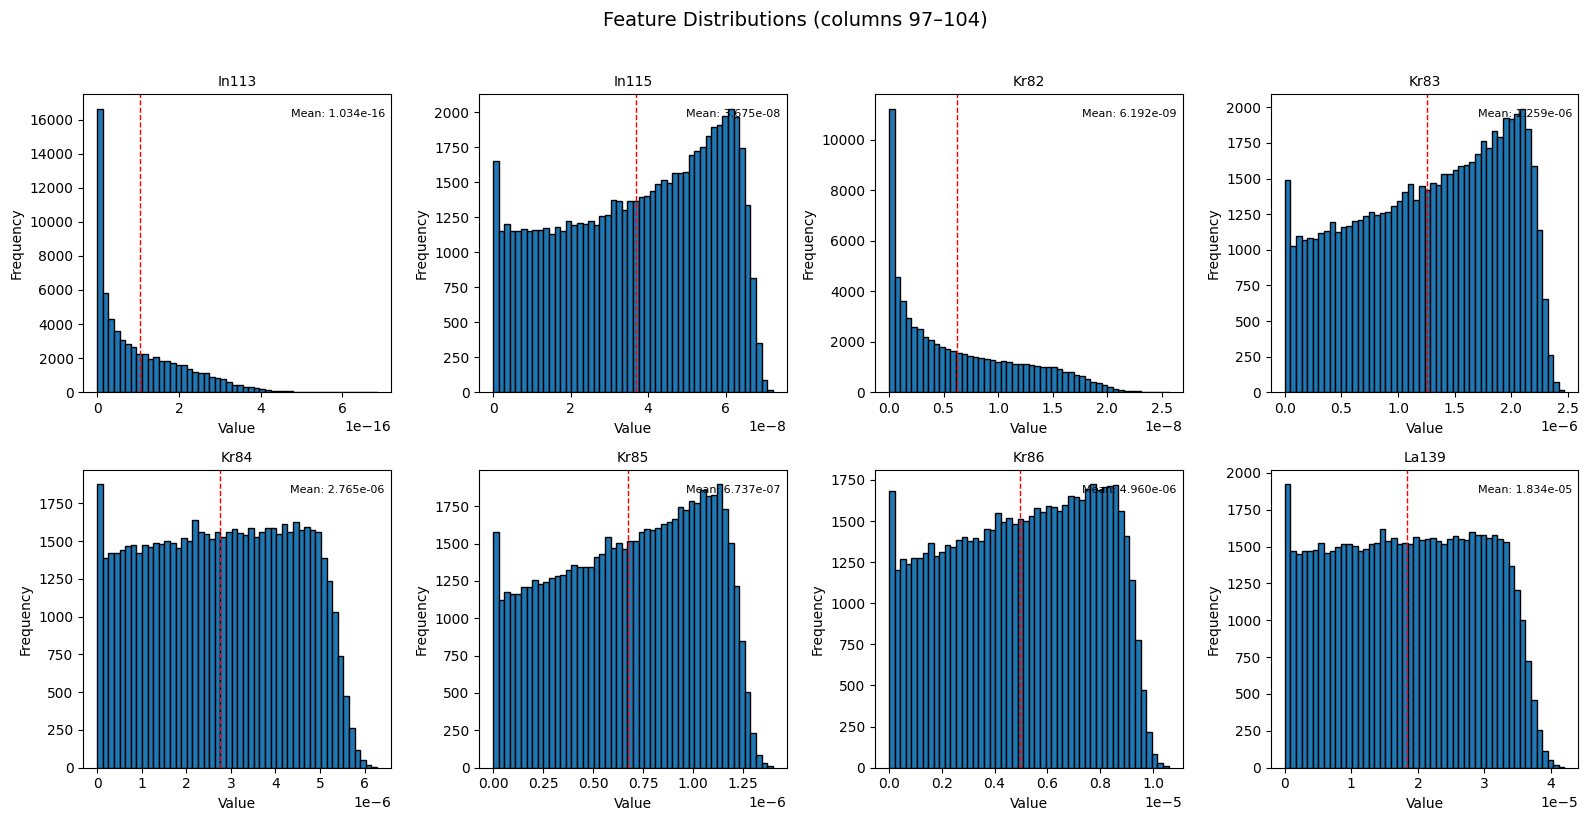

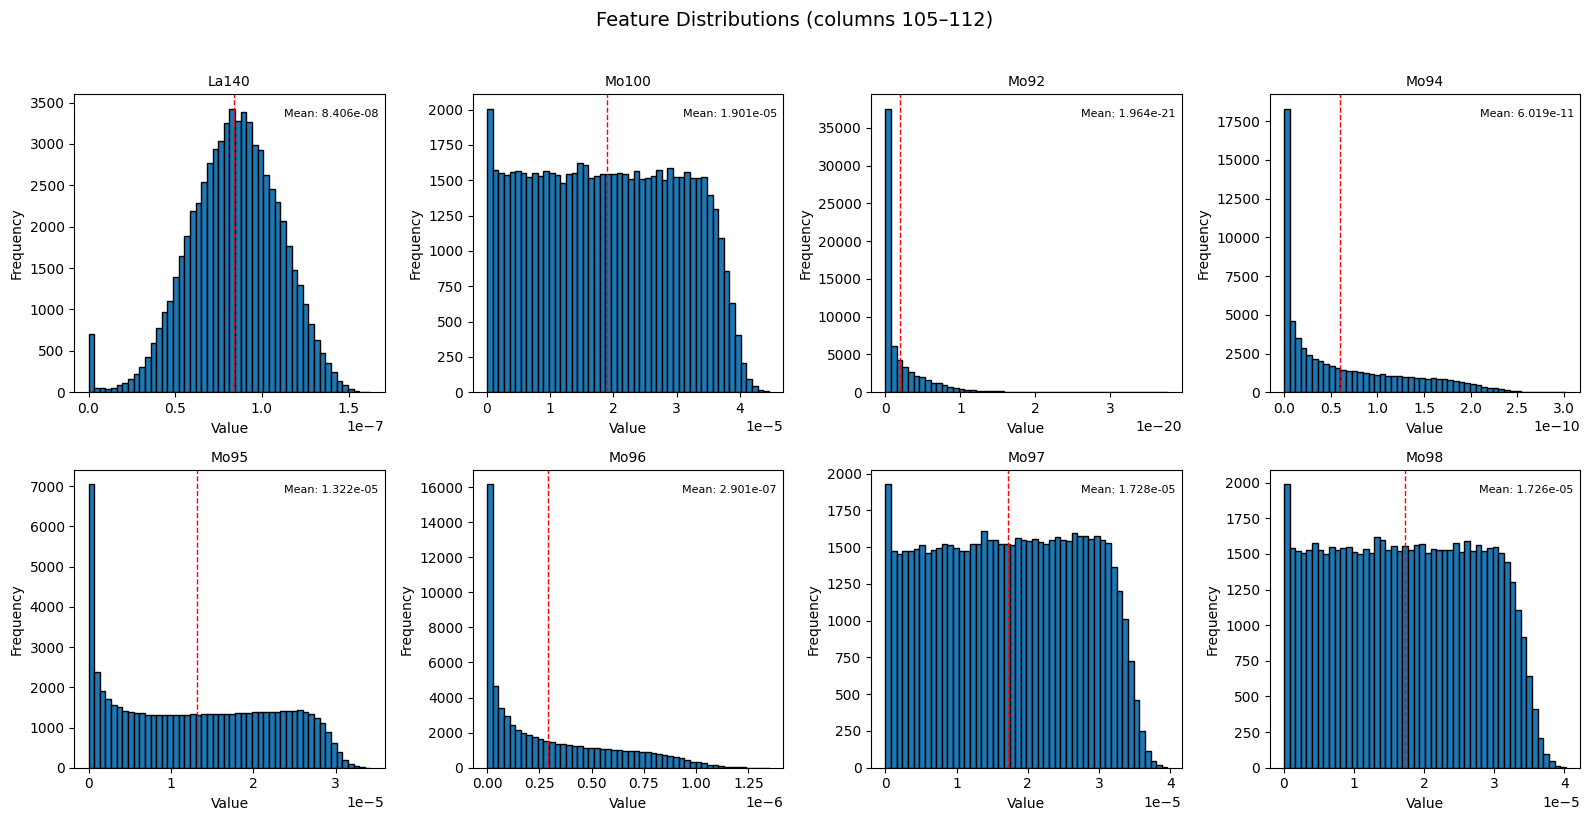

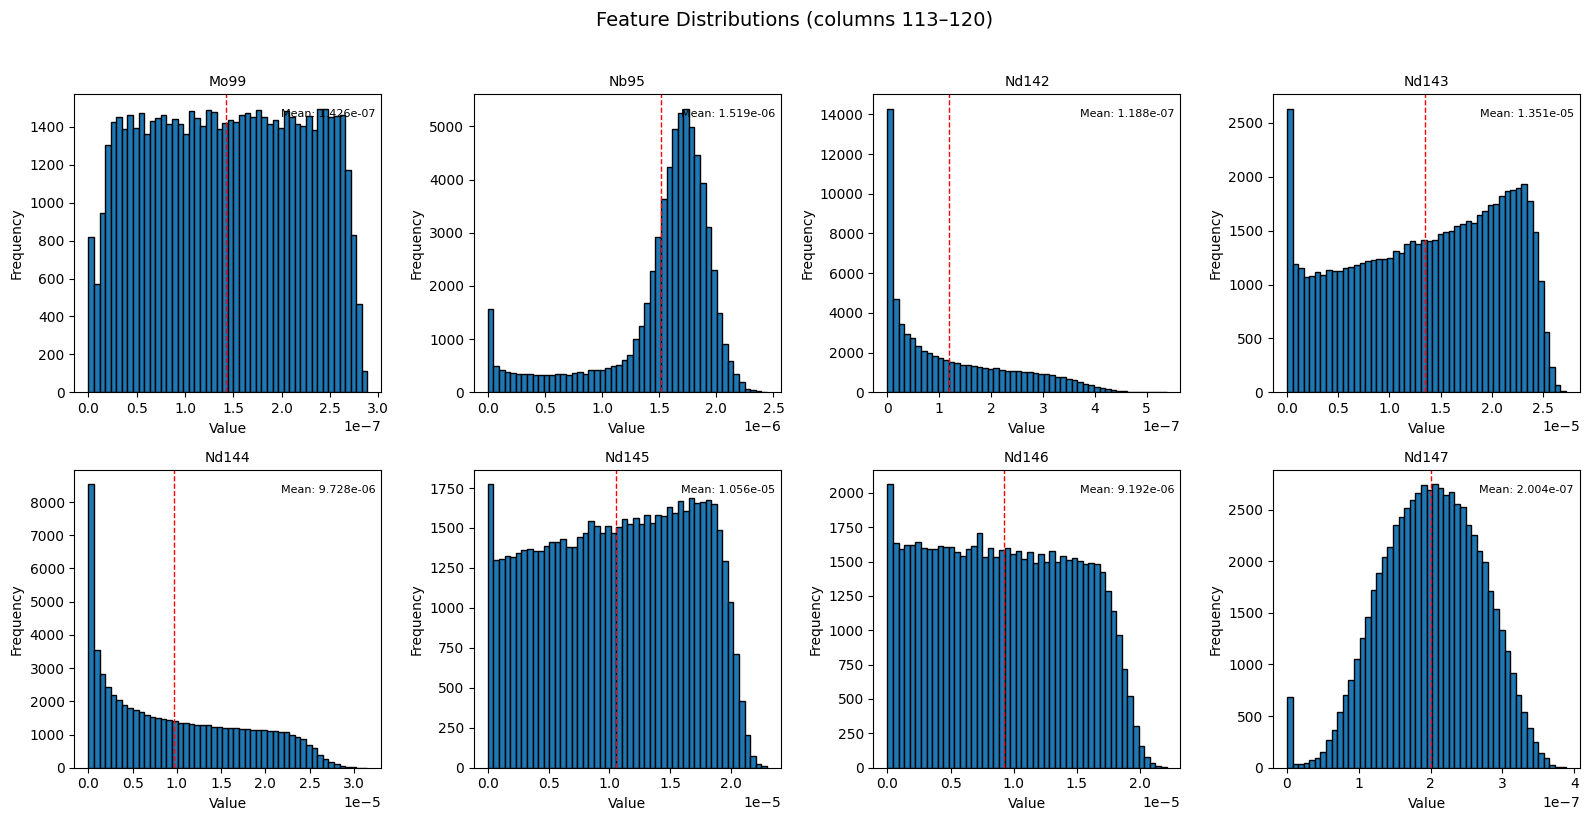

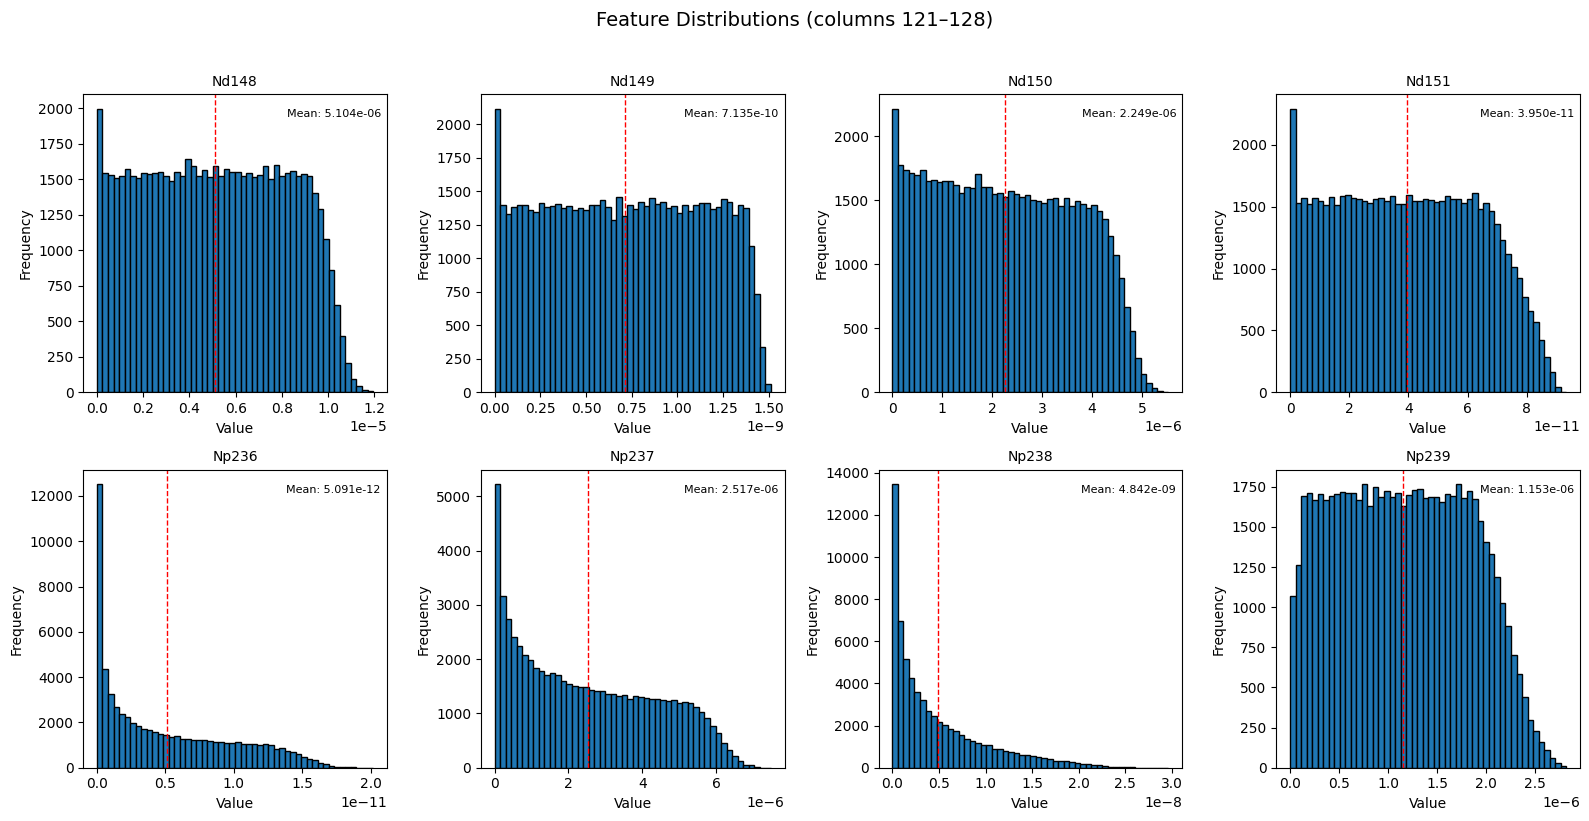

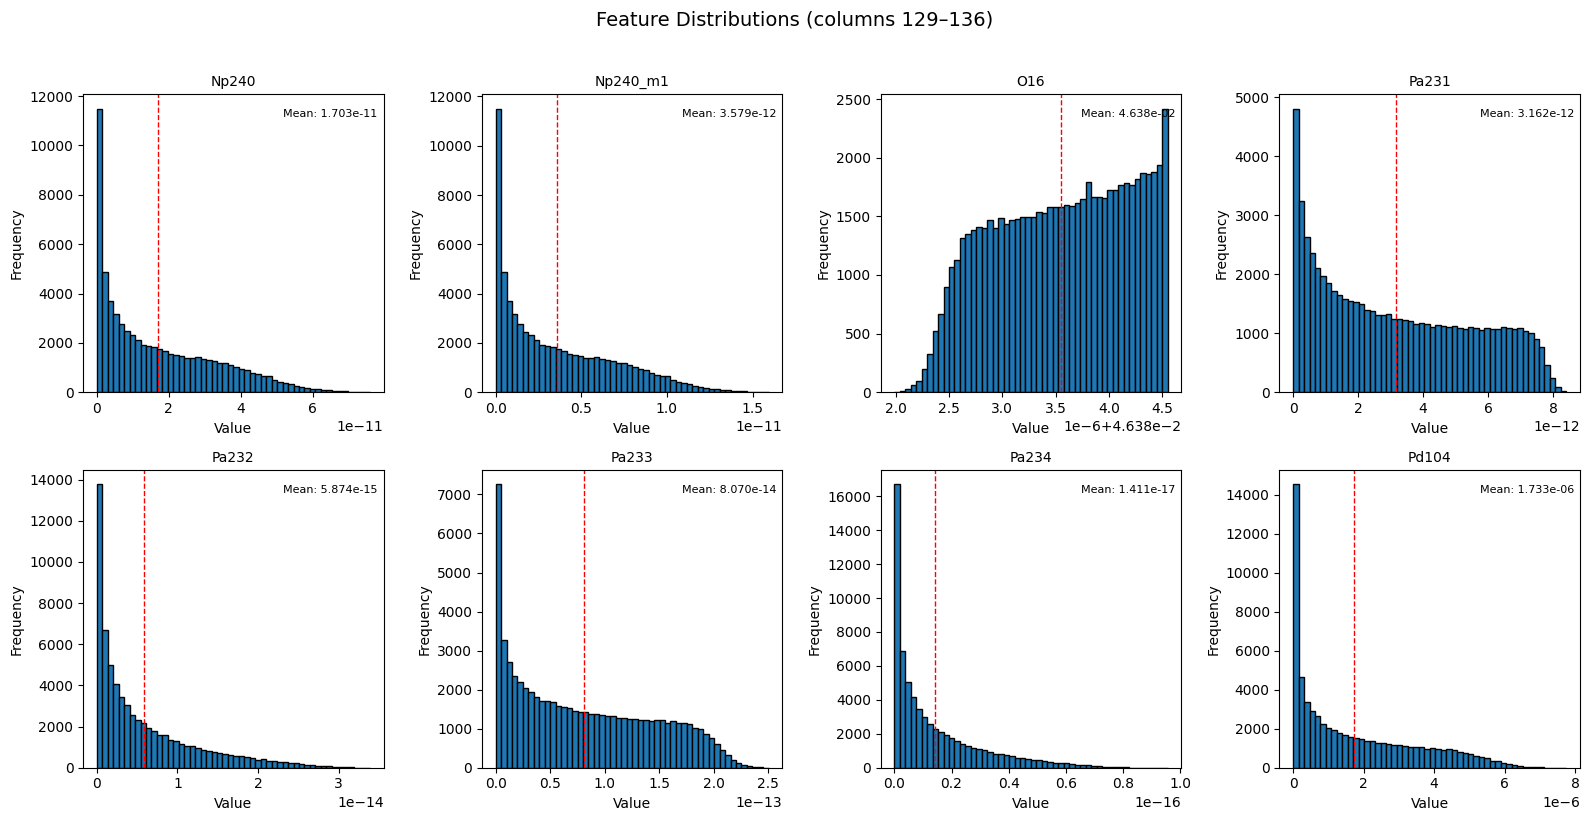

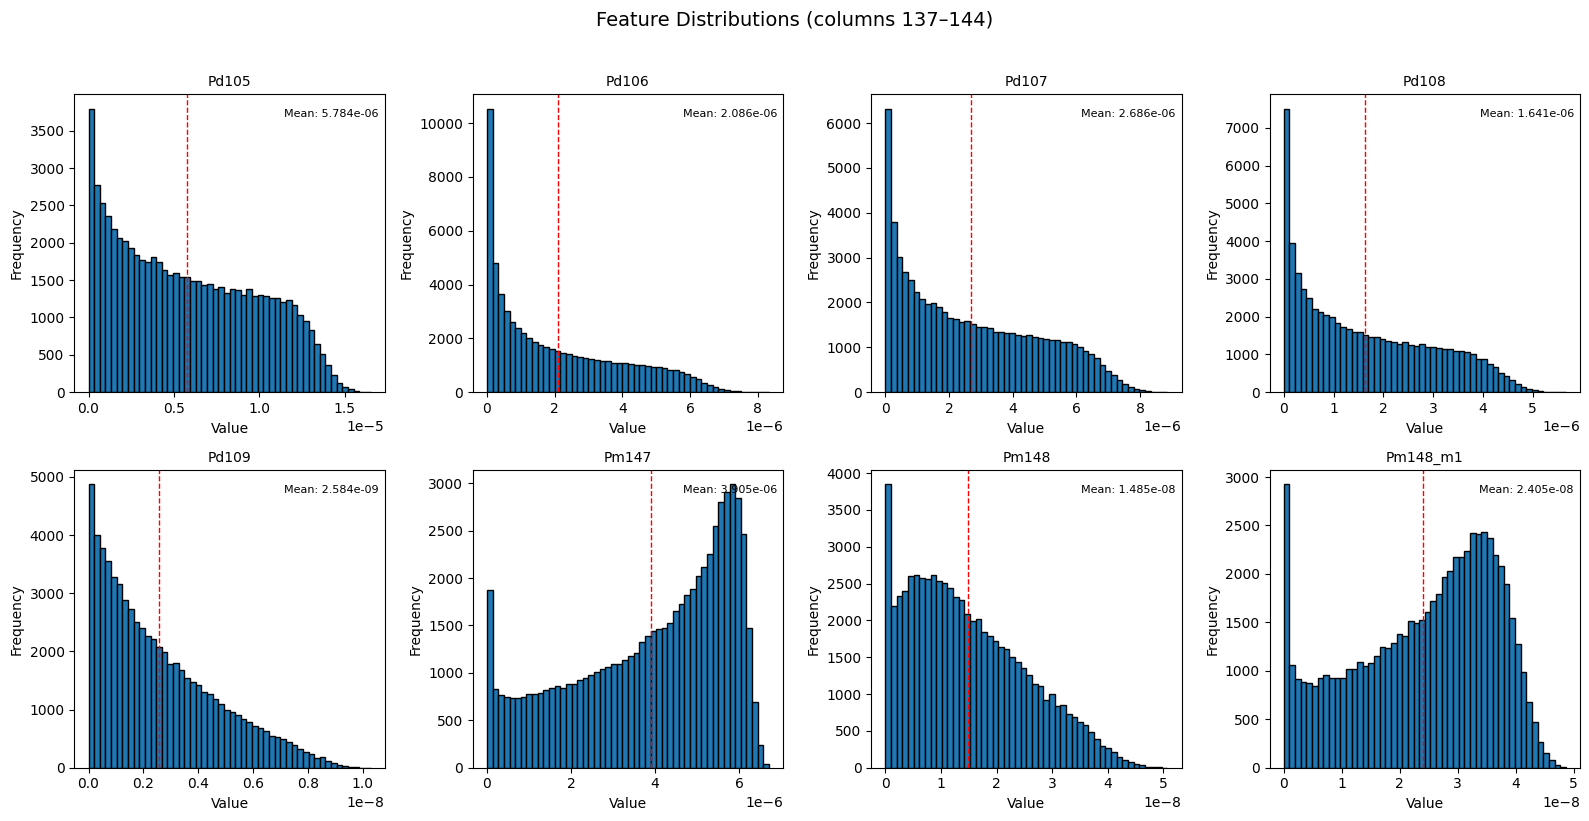

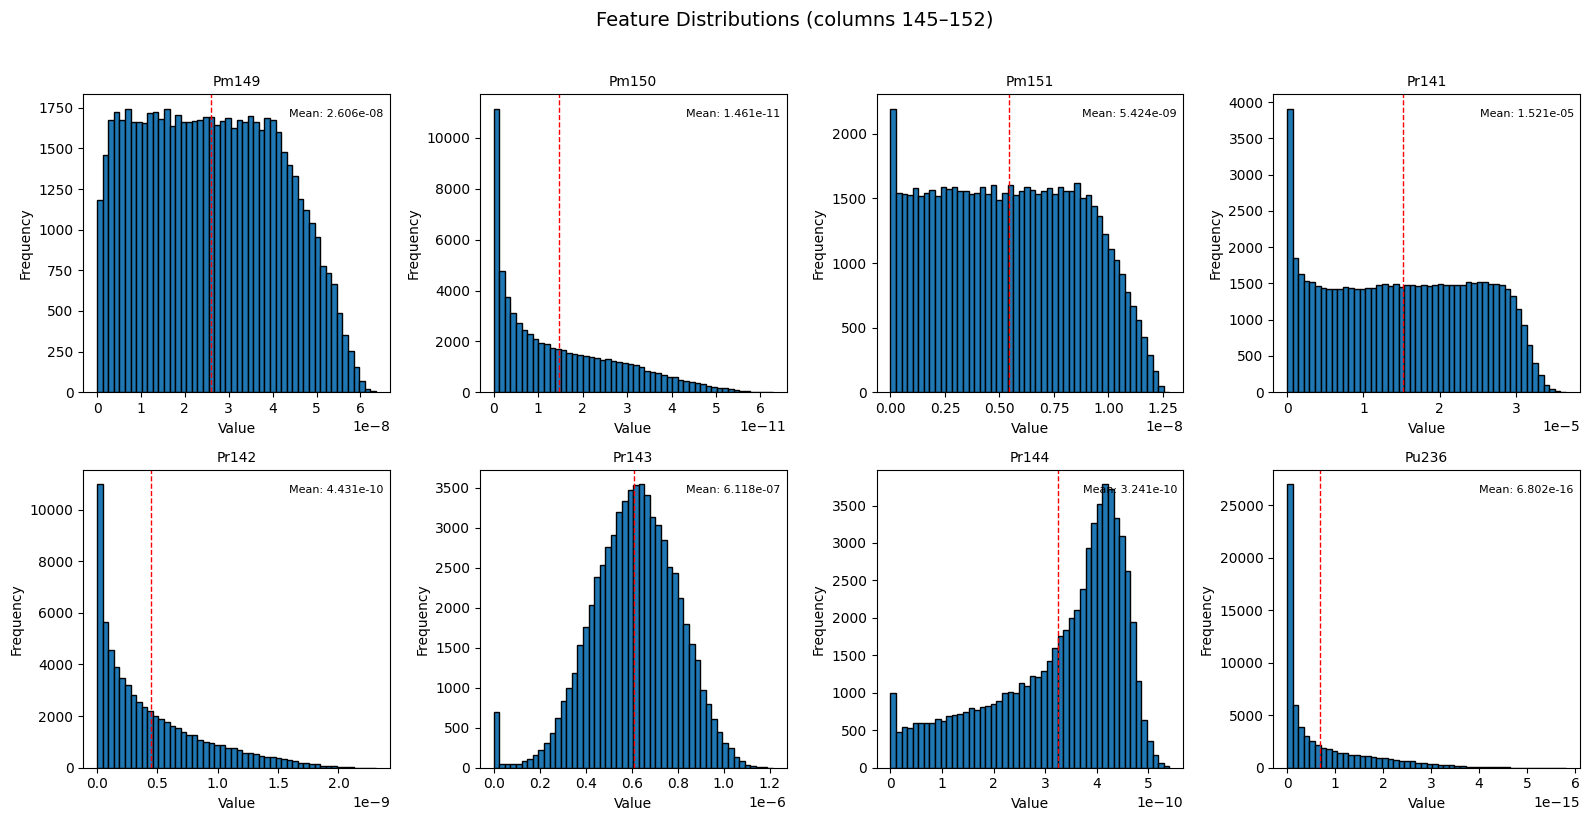

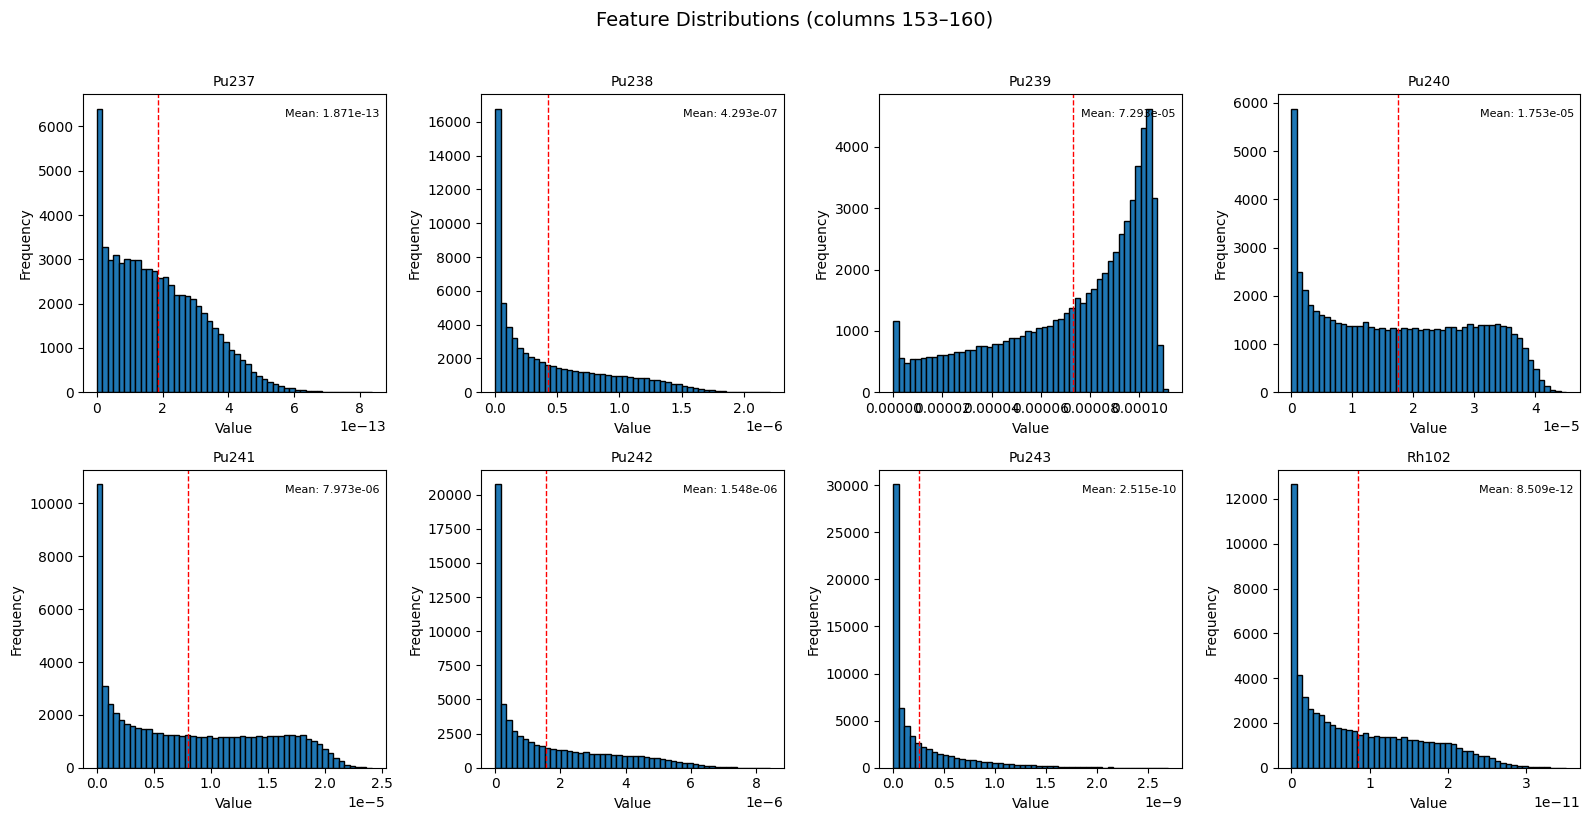

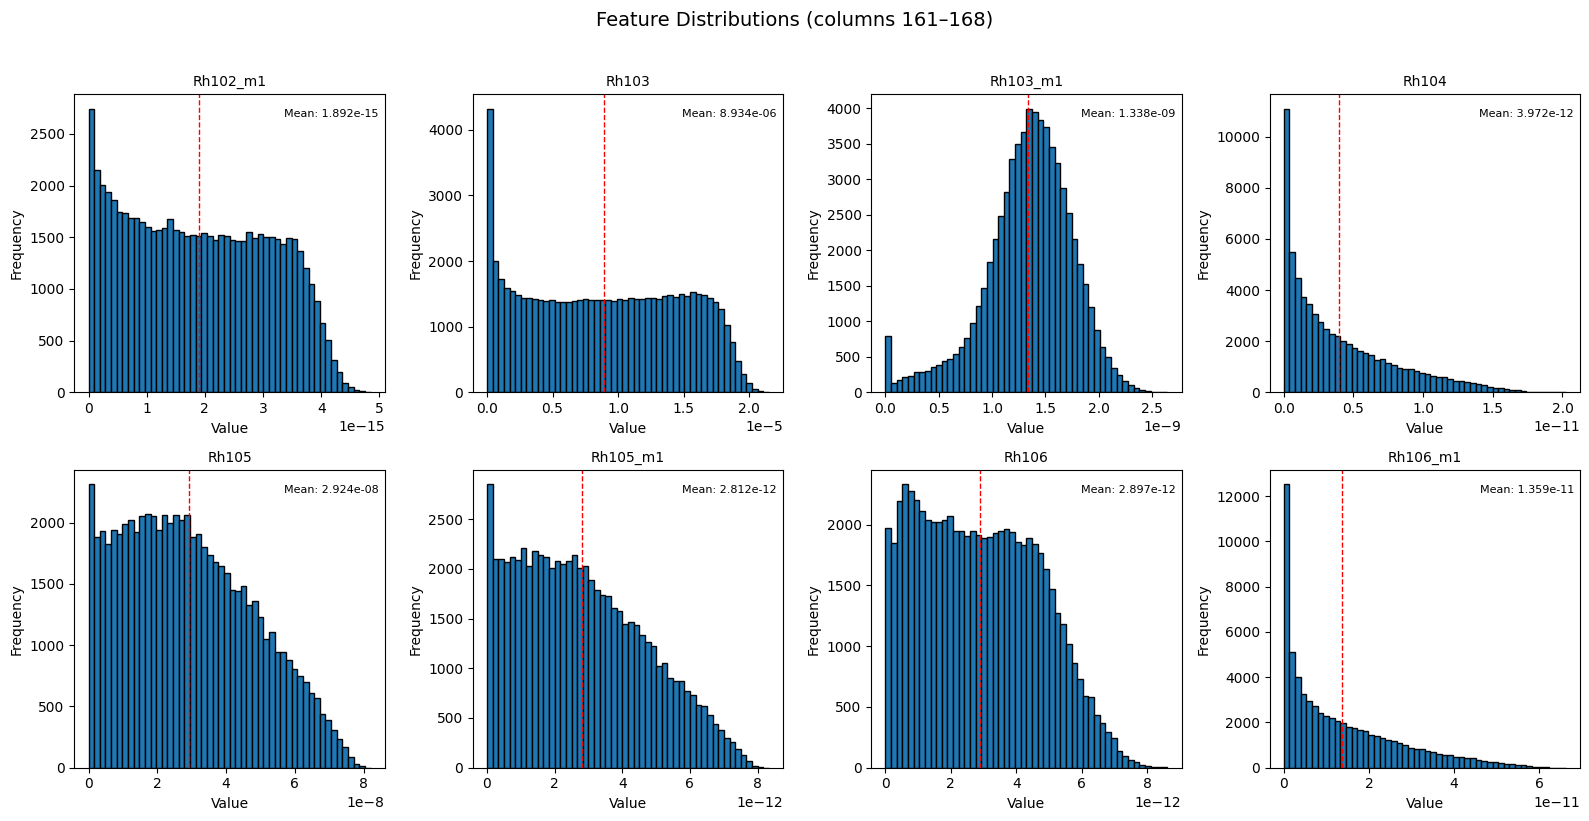

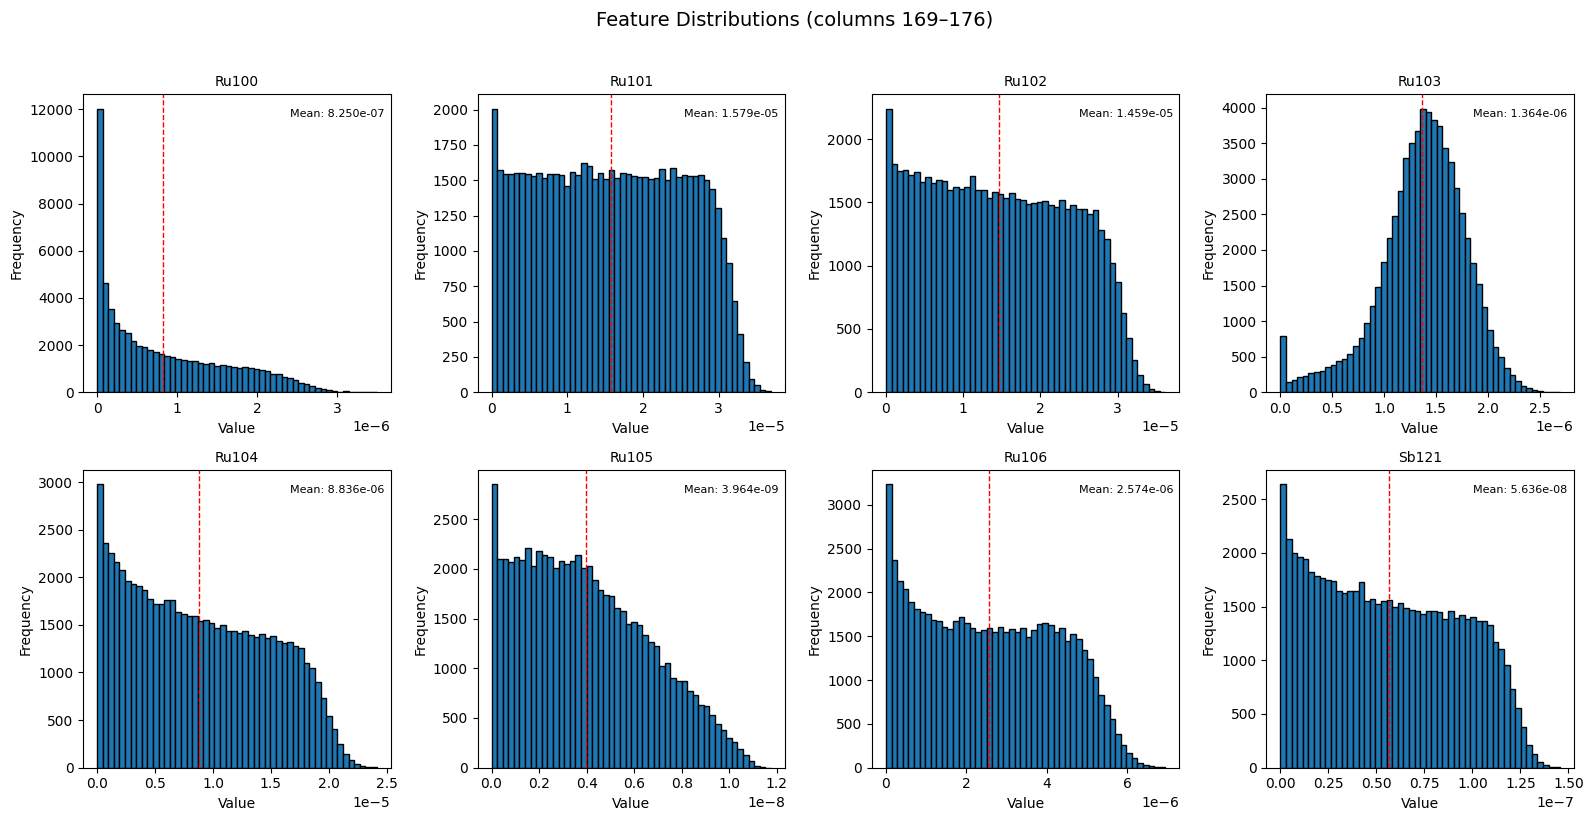

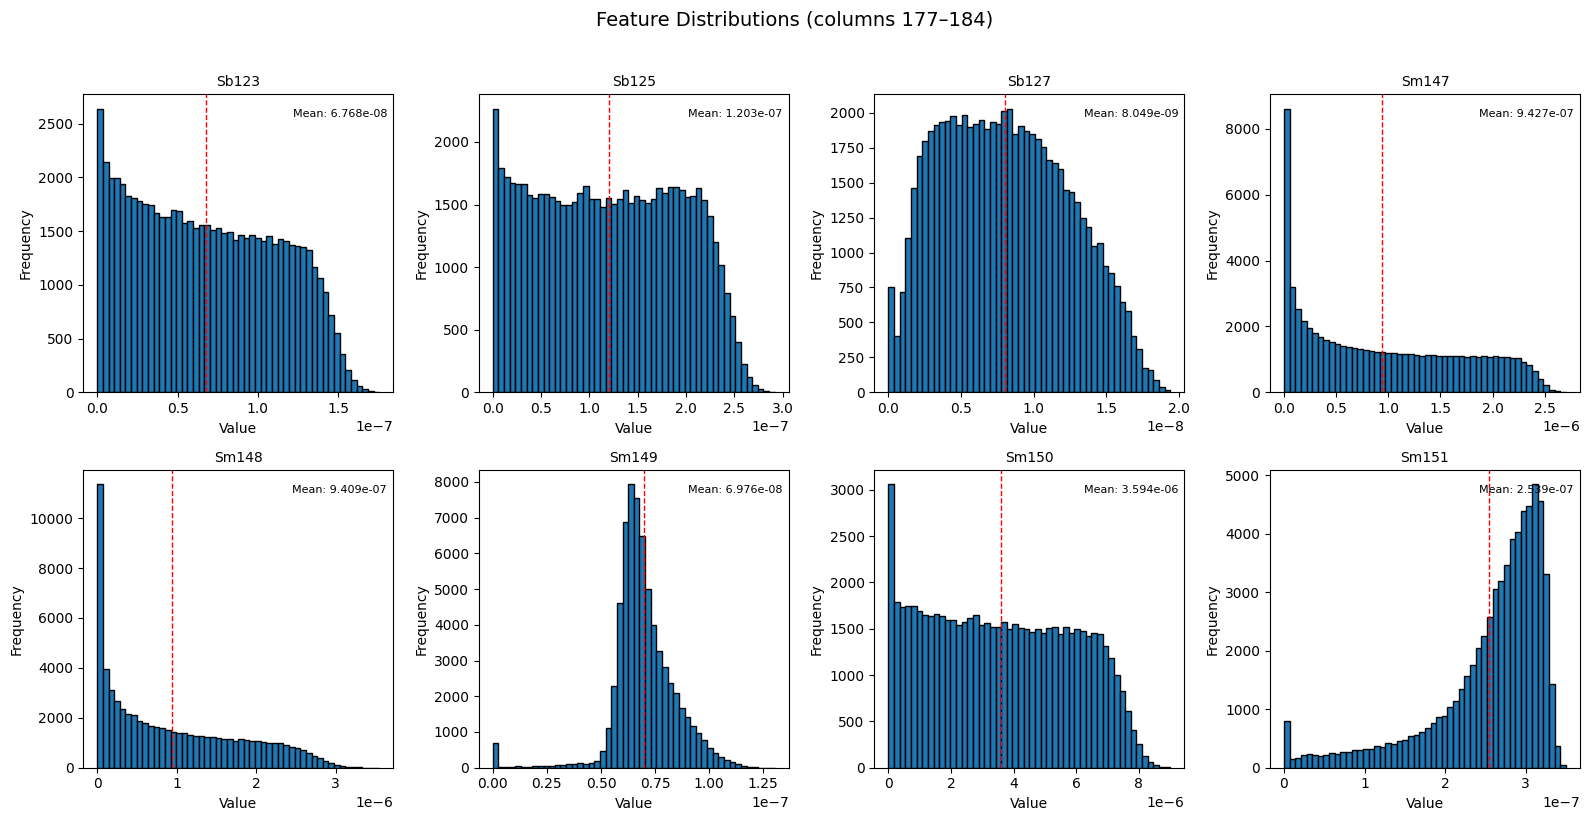

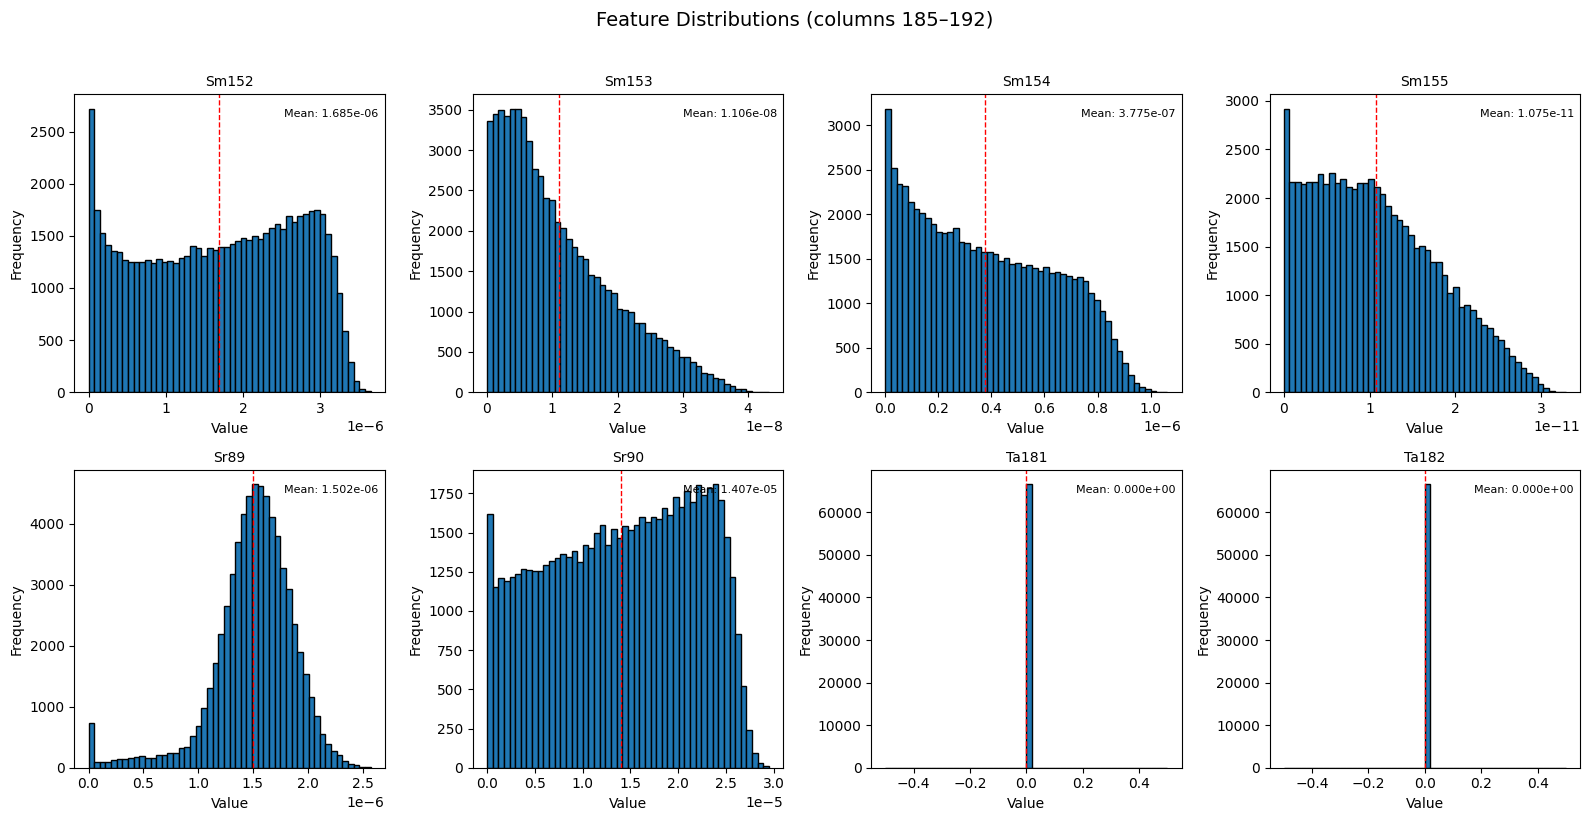

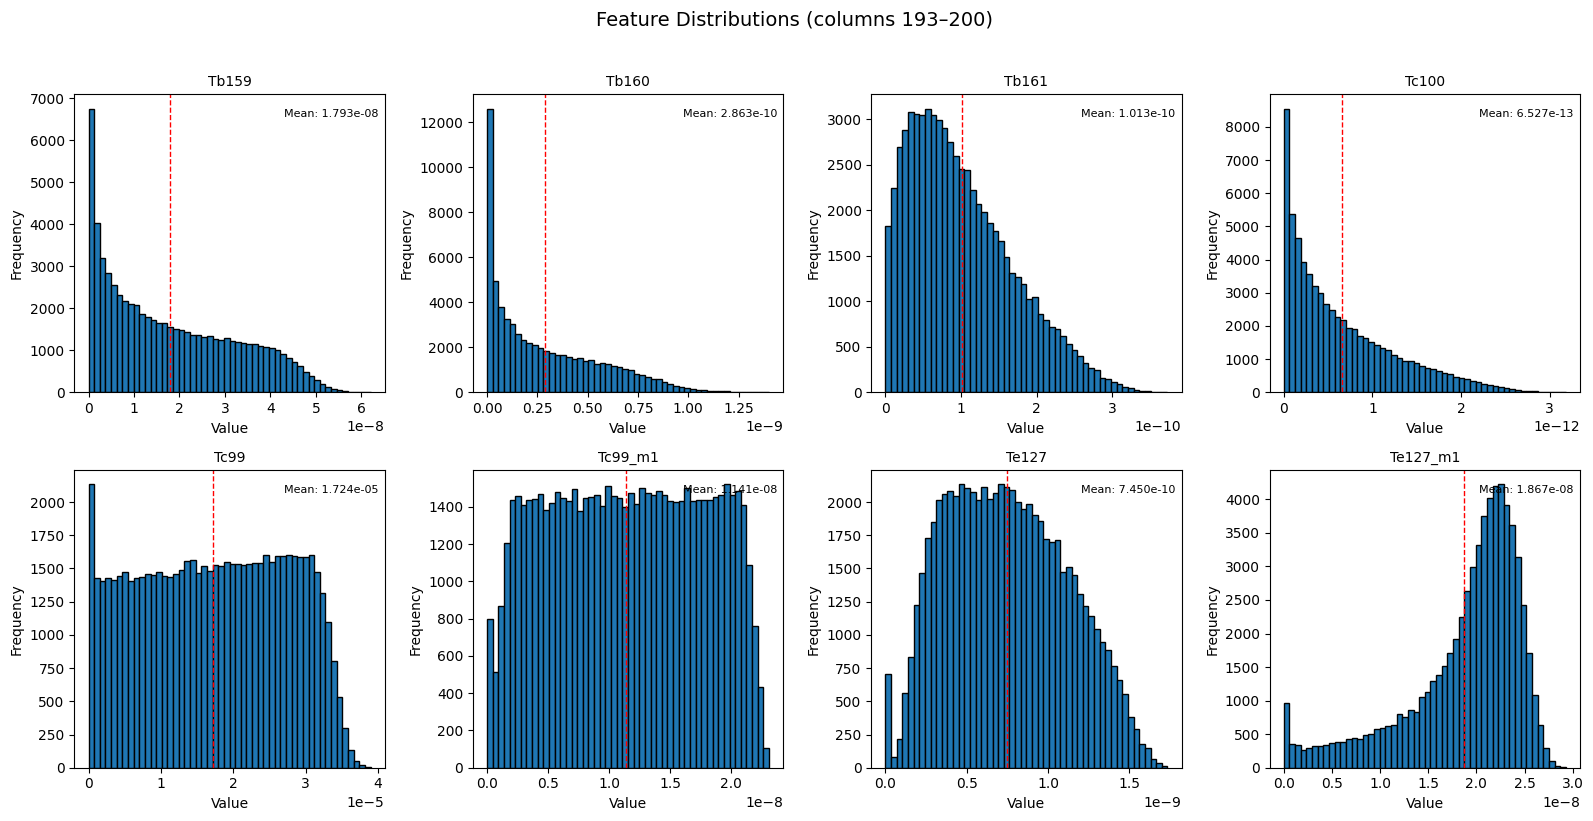

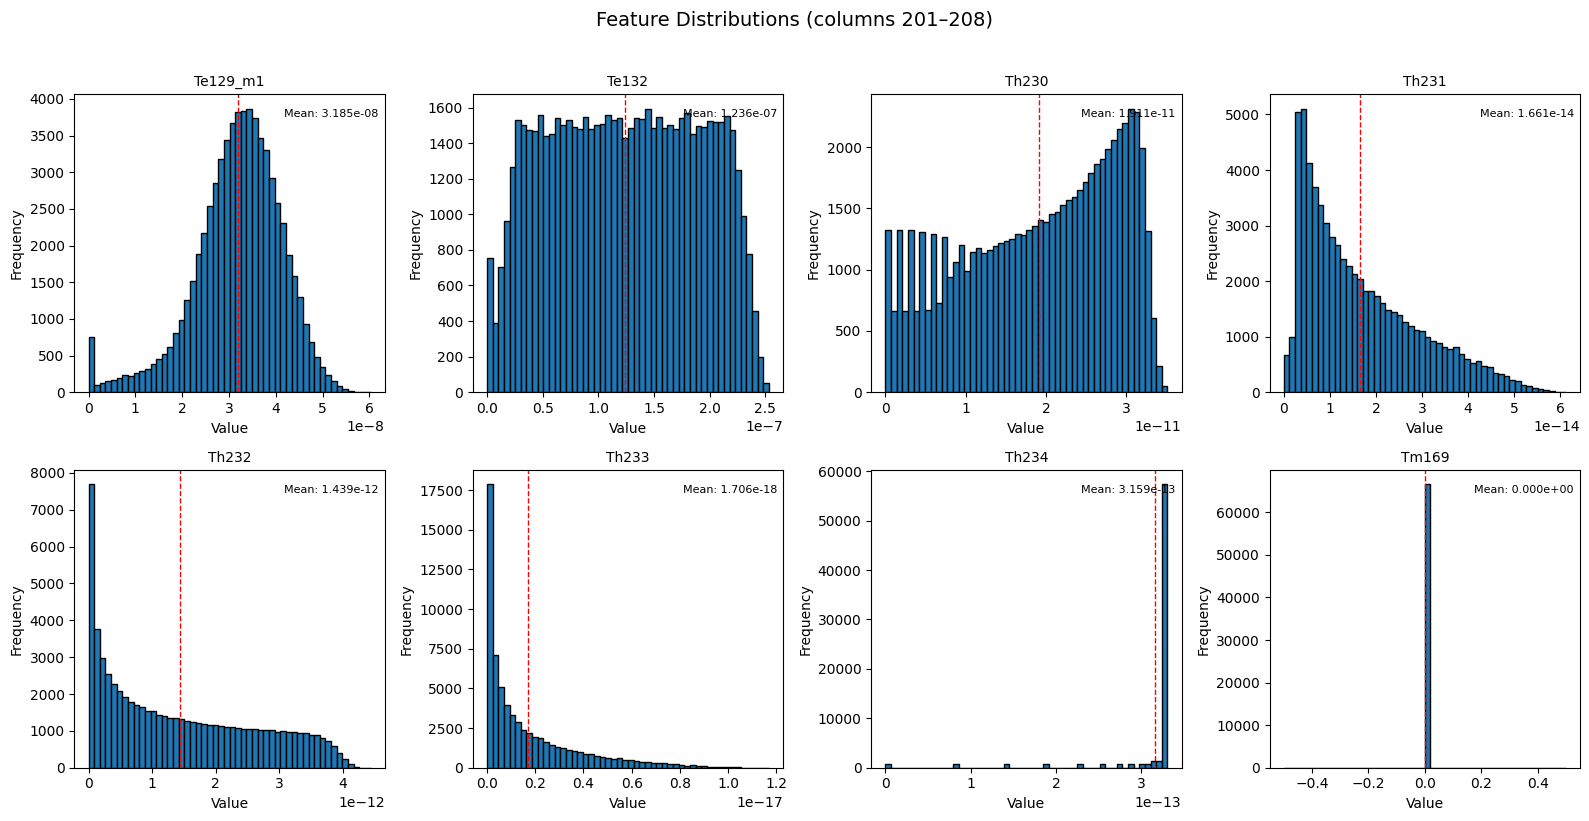

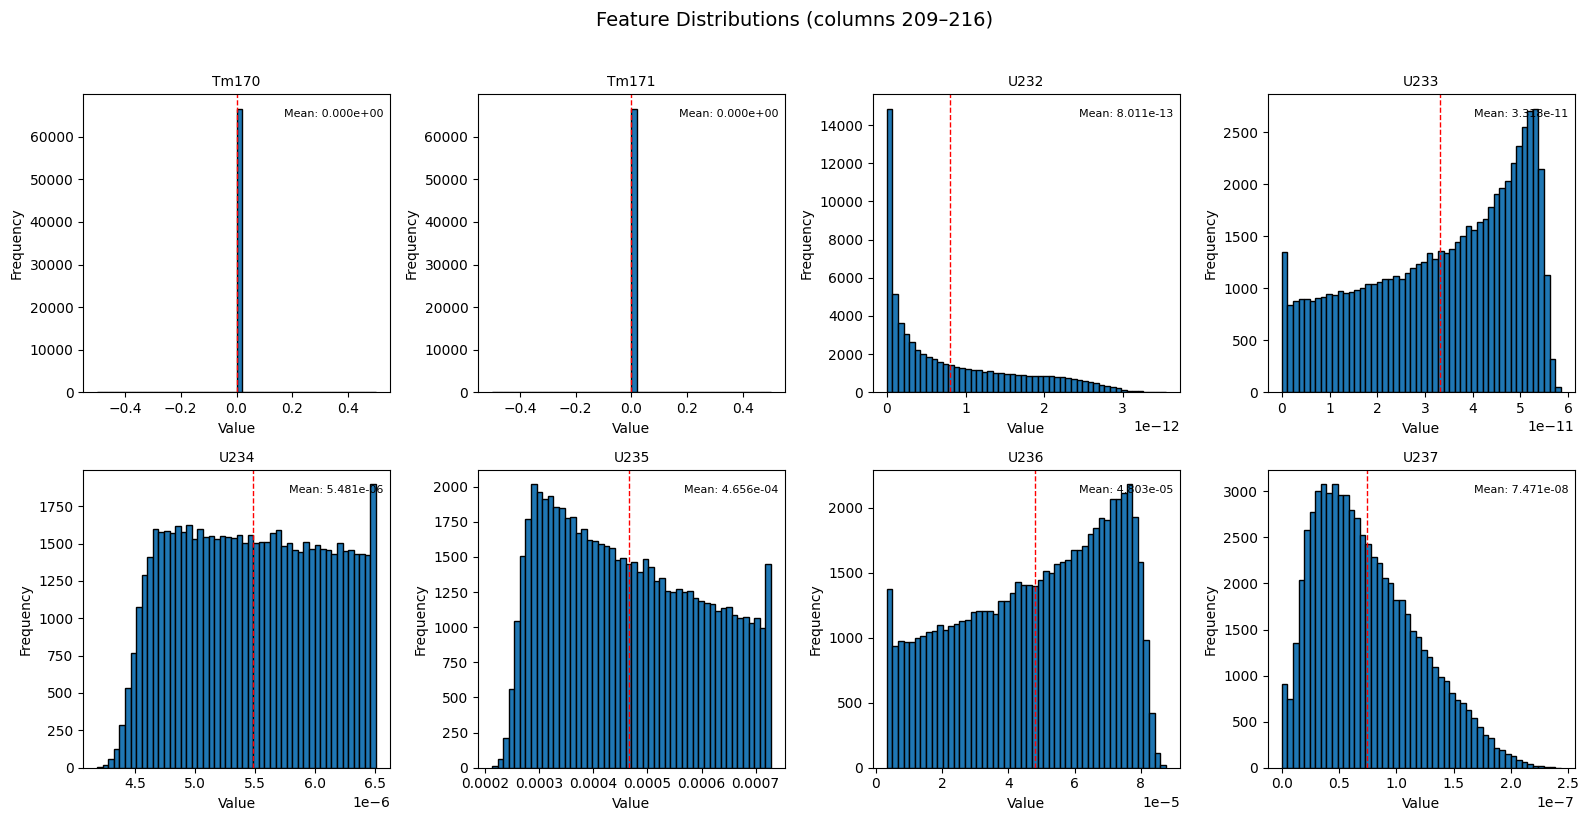

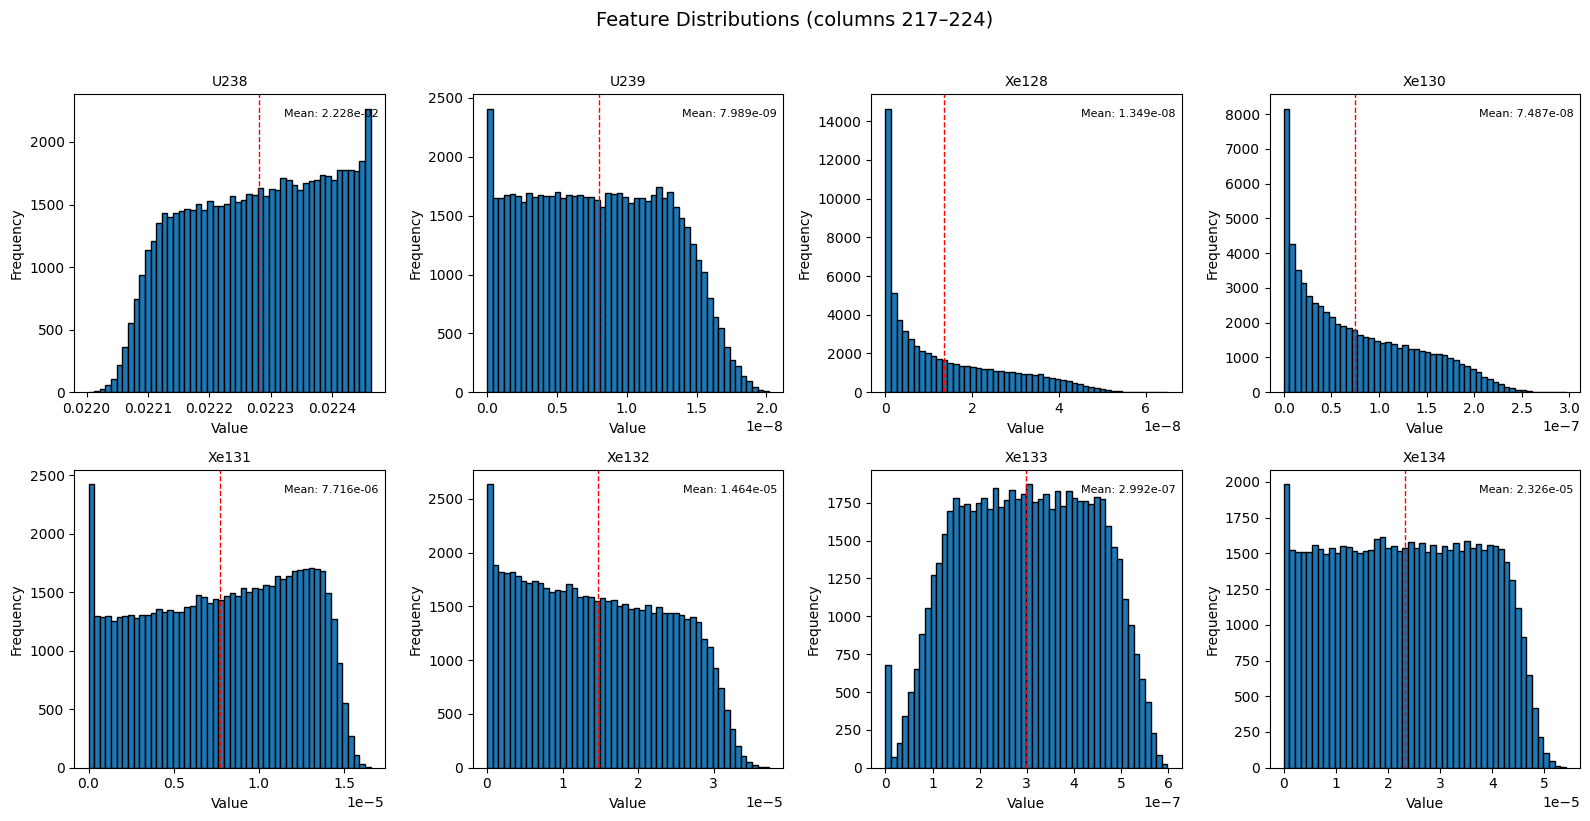

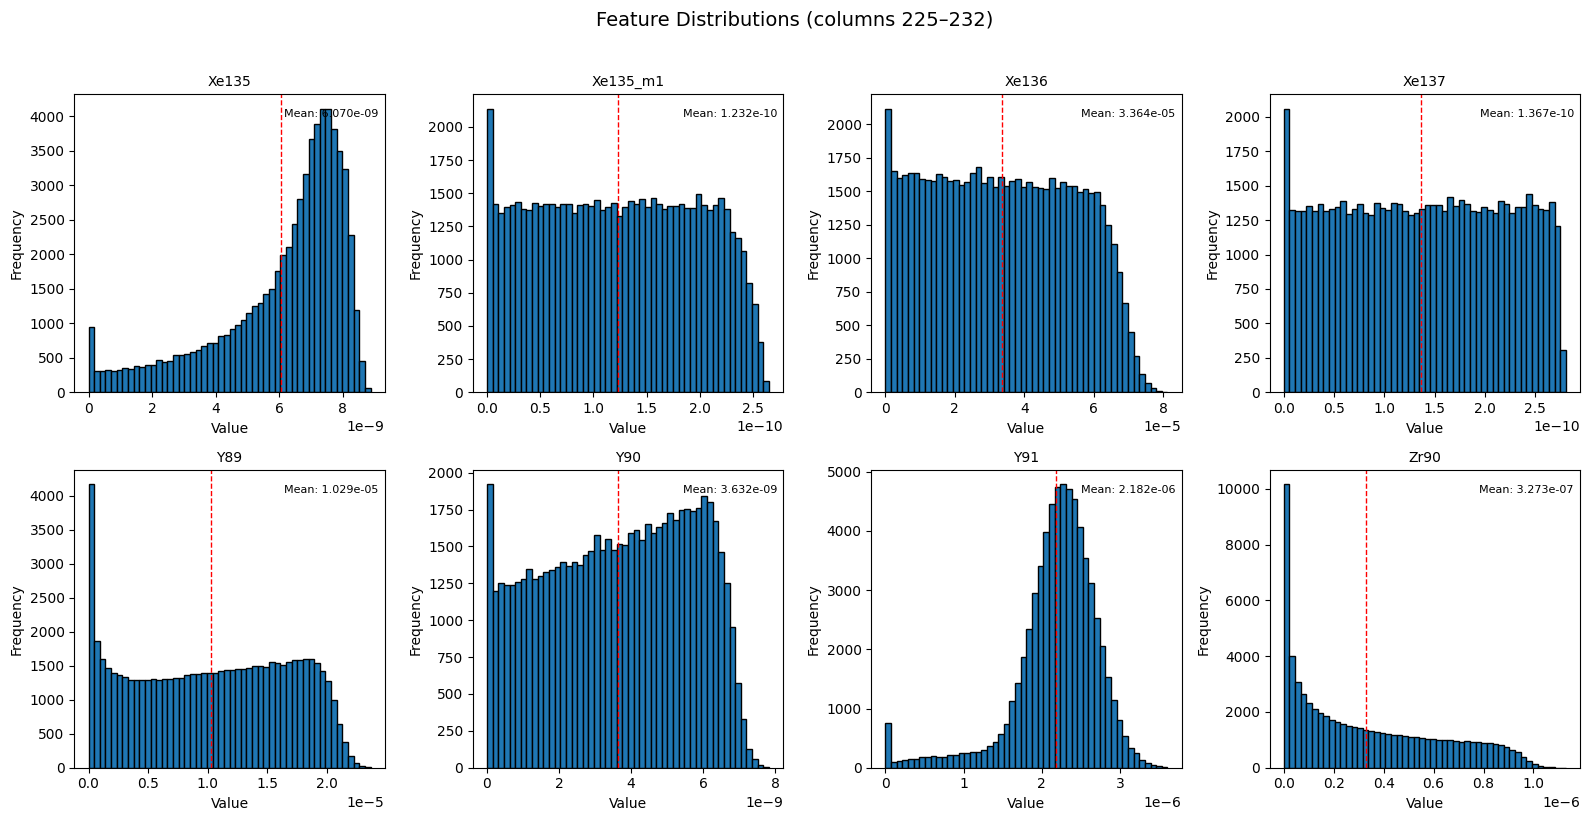

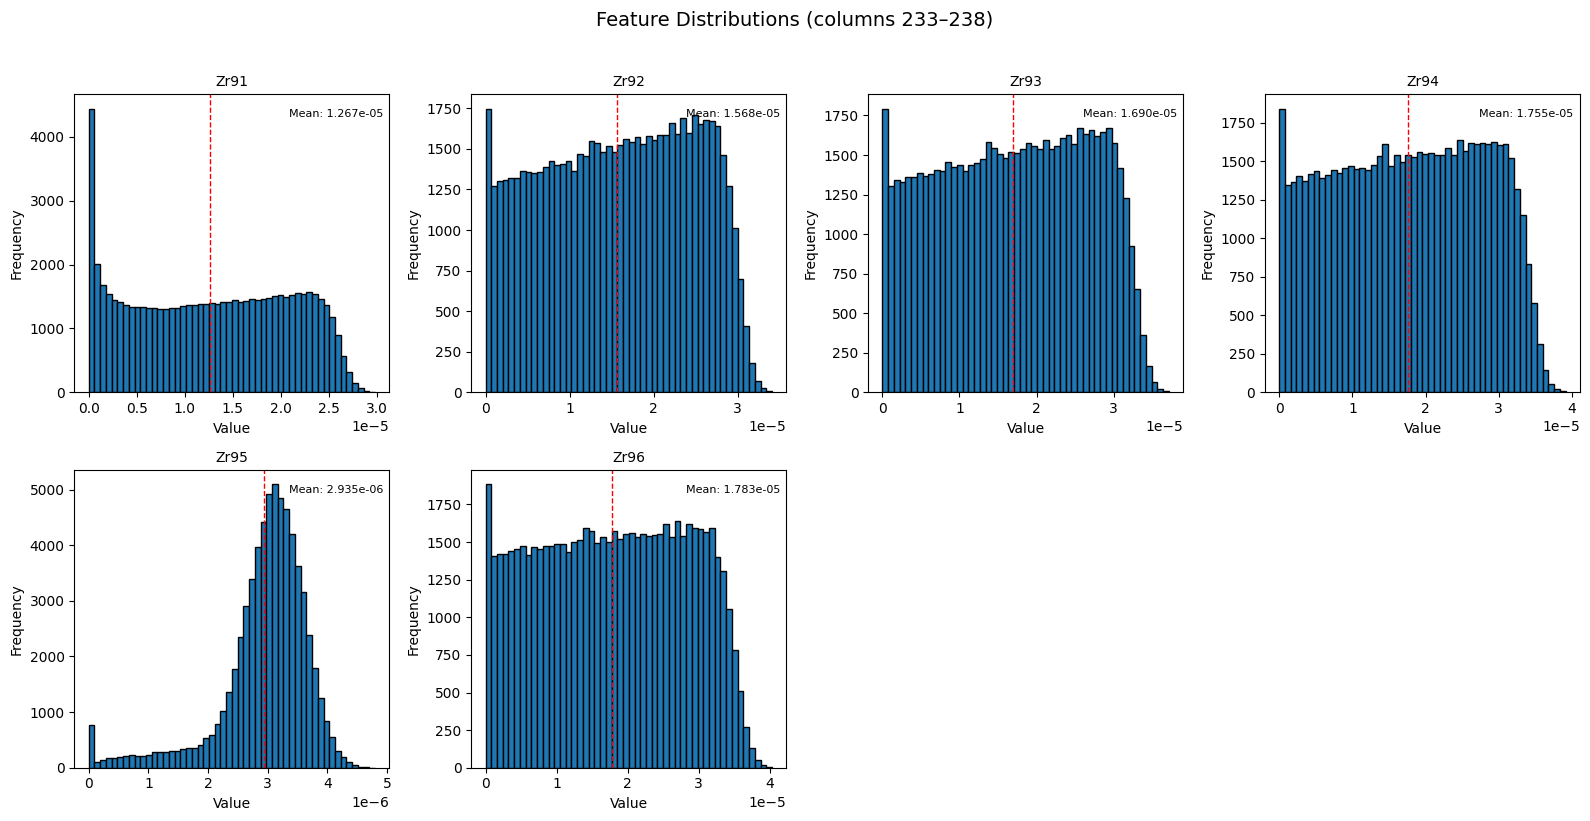

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

In [7]:
i = 1
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df, start_idx=i, n_plots=8, bins=50)
i = i + 8

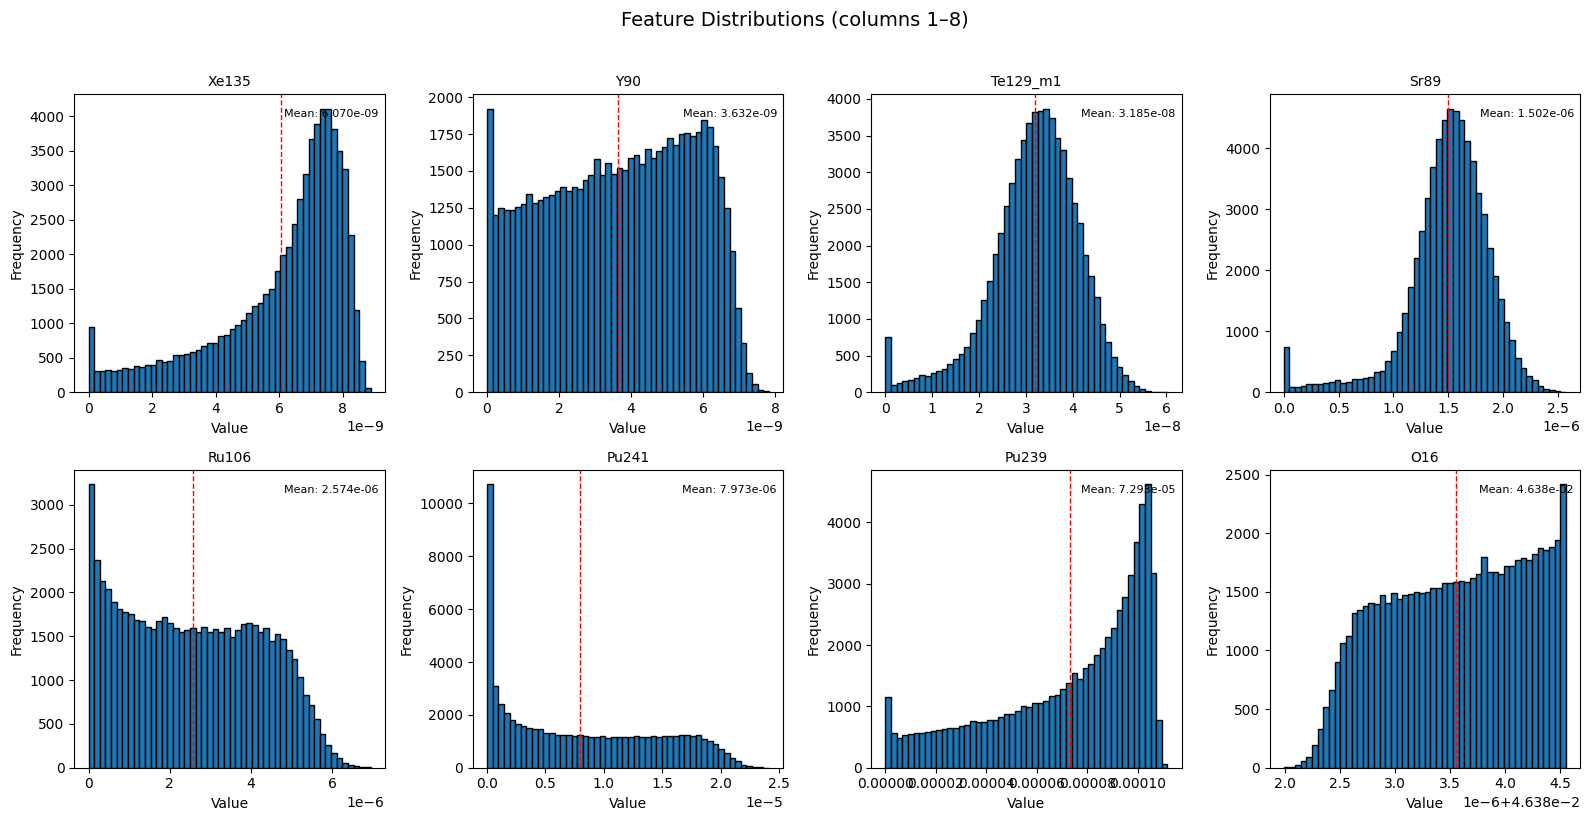

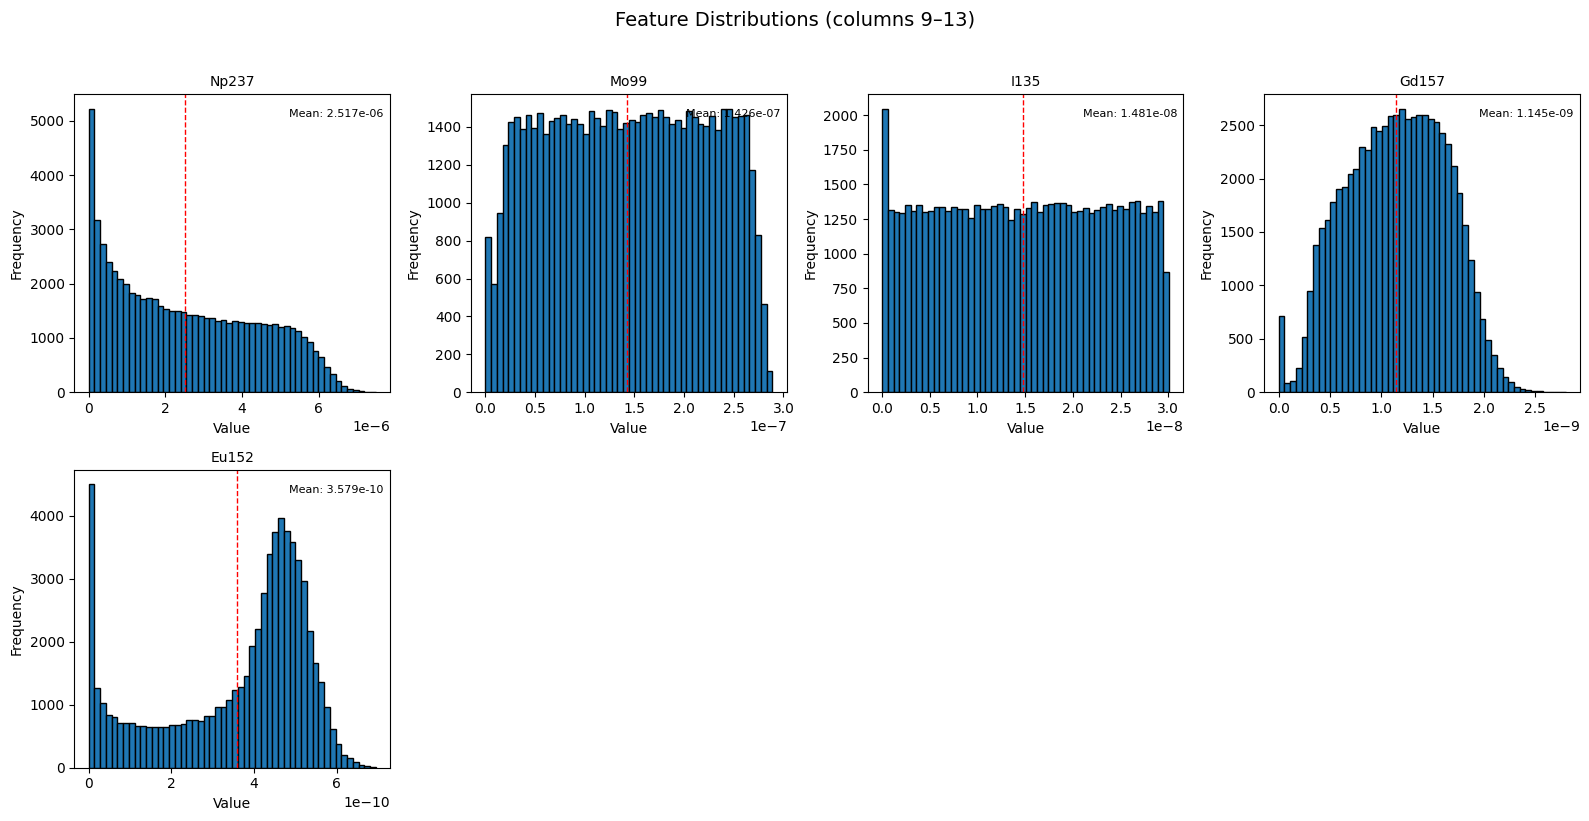

In [ ]:
elements_to_keep = ['Zr95', 'Xe135', 'Y90', 'Te129_m1', 'Sr89', 'Ru106', 'Pu241', 'Pu239', 'O16', 'Np237', 'Mo99', 'I135', 'Gd157', 'Eu152']


# Remove the unnecessary columns from the dataframe
df_trimmed = df[elements_to_keep]
i = 1
plot_column_block(df_trimmed, start_idx=i, n_plots=8, bins=50)
i = i + 8
plot_column_block(df_trimmed, start_idx=i, n_plots=8, bins=50)
i = i + 8

In [ ]:
print(df.iloc[:102]['U238'])
# To see that runs are 101 steps lonag

0      0.022463
1      0.022458
2      0.022454
3      0.022454
4      0.022453
         ...   
97     0.022051
98     0.022043
99     0.022041
100    0.022035
101    0.022463
Name: U238, Length: 102, dtype: float64


In [46]:
target_names = ['U238', 'U235', 'Pu240', 'Pu241']  # All others are considered as inputs
input_cols = df.columns

# Get indices for input and target columns
target_indices = [df.columns.get_loc(col) for col in target_names]
input_indices = [df.columns.get_loc(col) for col in input_cols]

# Find run boundaries (every 101 rows)
n_sequences = len(df) // 101
run_start_indices = []
run_end_indices = []

for i in range(n_sequences):
  run_start_indices.append(i * 101)
  run_end_indices.append(i * 101 + 100)

# Create mask: exclude first index (for targets) and last index (for inputs) of each run
target_valid_mask = np.ones(len(df), dtype=bool)
input_valid_mask = np.ones(len(df), dtype=bool)

target_valid_mask[run_start_indices] = False  # Exclude first of each run from targets
input_valid_mask[run_end_indices] = False     # Exclude last of each run from inputs

target_valid_indices = np.where(target_valid_mask)[0]
input_valid_indices = np.where(input_valid_mask)[0]

# Create inputs and targets
inputs = df.iloc[input_valid_indices][input_cols].values
targets = df.iloc[target_valid_indices][target_names].values

print(f"Detected {n_sequences} runs of 101 timesteps each")
print(f"Input shape: {inputs} | Target shape: {targets}")
print(f"Targets: {target_names}")

Detected 1200 runs of 101 timesteps each
Input shape: [[2.22529990e-02 7.21750020e-04 0.00000000e+00 ...            nan
  7.76675725e-01 9.51139048e+02]
 [2.22480290e-02 7.12664640e-04 2.18289710e-08 ...            nan
  8.34162425e-01 7.14930212e+02]
 [2.22480290e-02 7.12664560e-04 2.18447430e-08 ...            nan
  8.46534105e-01 5.72906990e+02]
 ...
 [2.19459410e-02 3.14227170e-04 3.17357000e-05 ...            nan
  7.84944955e-01 9.33850863e+02]
 [2.19396340e-02 3.09329890e-04 3.22835790e-05 ...            nan
  7.74516770e-01 1.02331876e+02]
 [2.19380210e-02 3.08000900e-04 3.24455950e-05 ...            nan
  8.02171886e-01 5.58782038e+02]] | Target shape: [[2.2248029e-02 7.1266464e-04 2.1828971e-08 3.3906551e-10]
 [2.2248029e-02 7.1266456e-04 2.1844743e-08 3.3862876e-10]
 [2.2243663e-02 7.0408077e-04 9.9293431e-08 2.9384942e-09]
 ...
 [2.1939634e-02 3.0932989e-04 3.2283579e-05 1.5786353e-05]
 [2.1938021e-02 3.0800090e-04 3.2445595e-05 1.5872051e-05]
 [2.1933978e-02 3.0486984e-04 

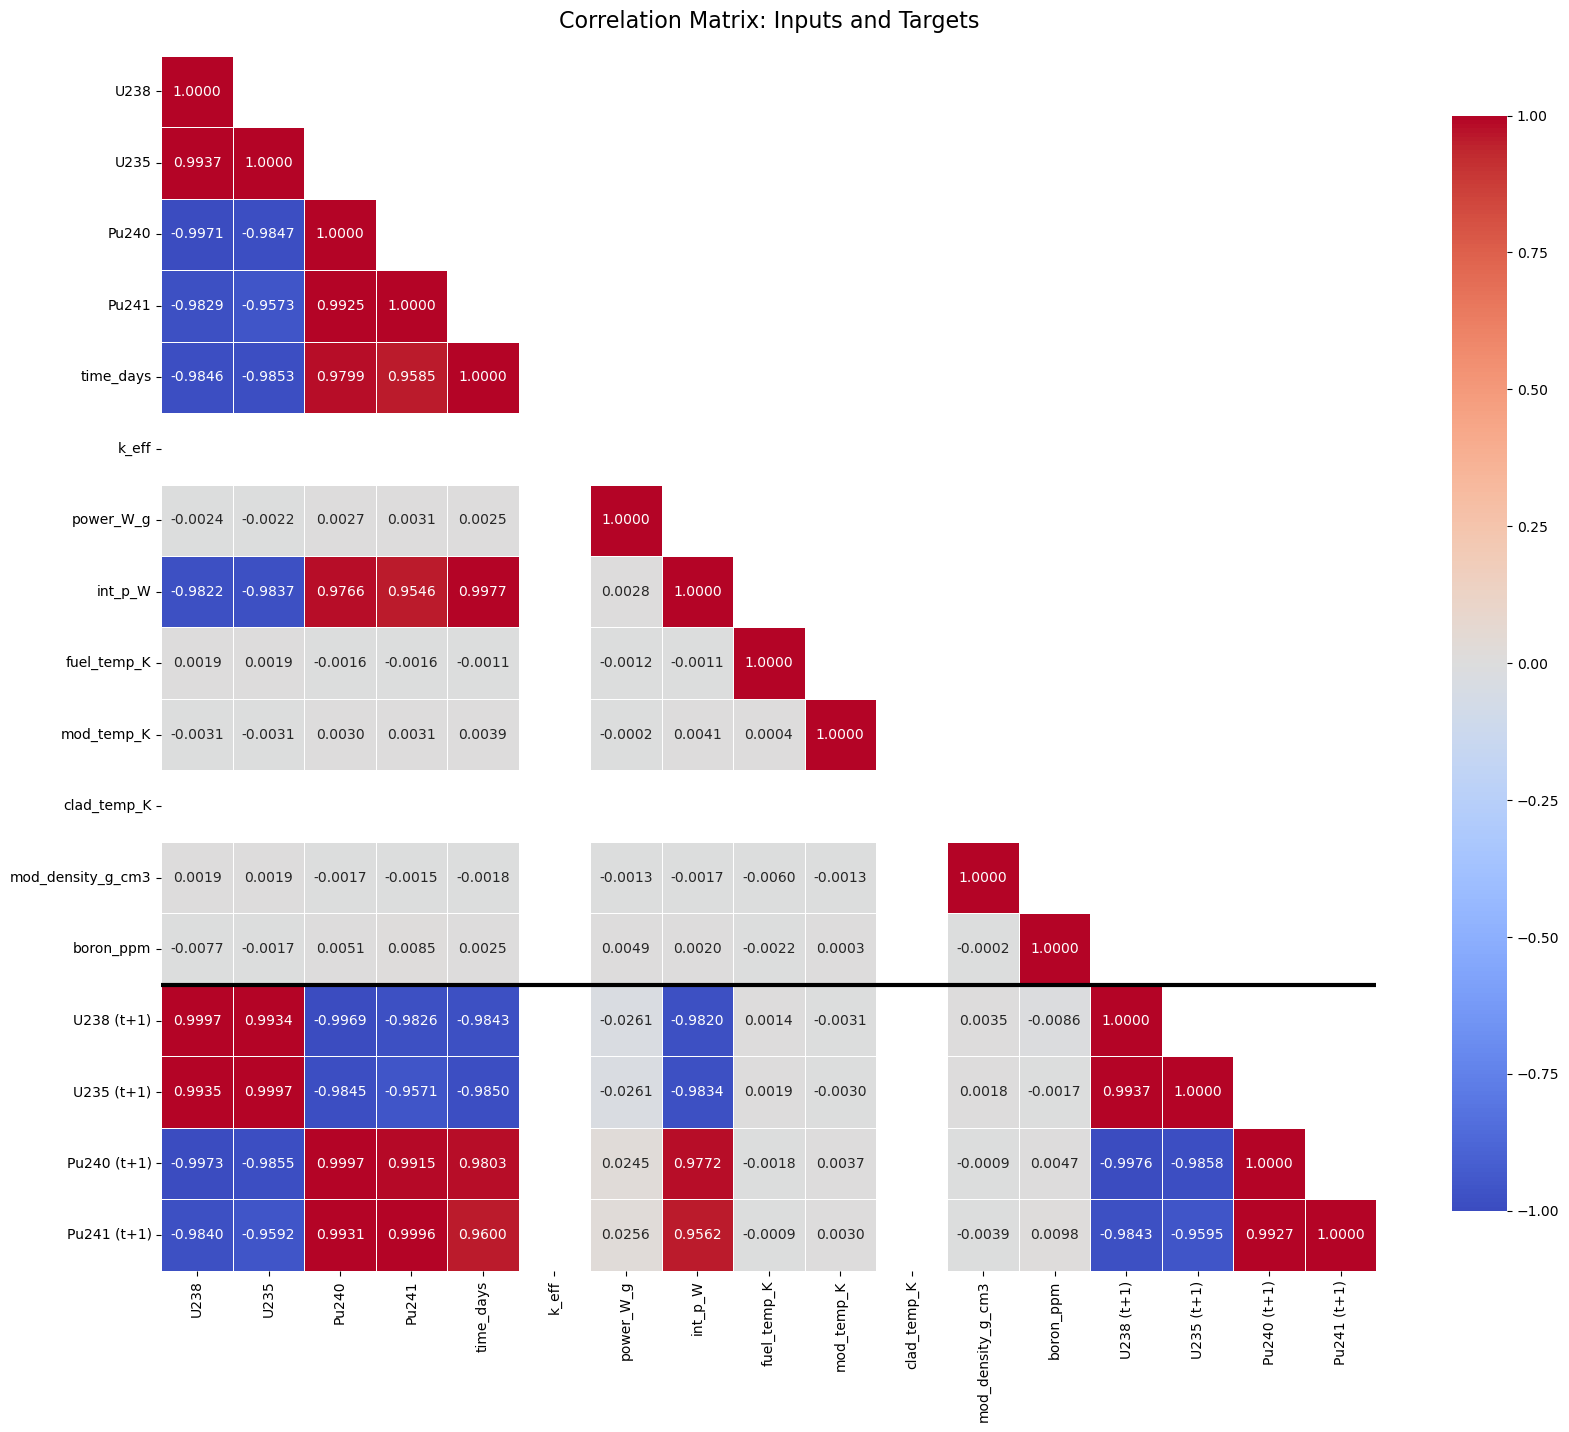

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Combine inputs and targets into one dataframe for correlation
combined_data = np.concatenate([inputs, targets], axis=1)
# Add (t+1) suffix to target names
target_names_t1 = [f"{name} (t+1)" for name in target_names]
combined_columns = list(input_cols) + target_names_t1

combined_df = pd.DataFrame(combined_data, columns=combined_columns)

# Calculate correlation matrix
corr_matrix = combined_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Create the plot
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            fmt='.4f', vmin=-1, vmax=1, ax=ax)

# Add separator line between inputs and targets
n_inputs = len(input_cols)
ax.axhline(y=n_inputs, color='black', linewidth=3)

plt.title('Correlation Matrix: Inputs and Targets', fontsize=16, pad=20)
plt.tight_layout()
plt.show()